<a href="https://colab.research.google.com/github/sajad95/Flowise/blob/main/Peak_timing_using_binary_ideas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importingt librarries** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame
from pandas import concat
from numpy import array
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [ ]:
import pandas as pd
import numpy as np
from dataclasses import dataclass
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame
from pandas import concat
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Flatten

from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, MaxPooling2D, Flatten,Conv1D,Dropout,MaxPooling1D,AveragePooling1D
# saving and loading the .h5 model
from keras.models import Model
# define the model architecture
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM, Dropout, Dense, Input, Dot, Activation
from keras.layers import SimpleRNN
#####
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# make the model reproducible Ask Luc
import time
import os
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.losses import Huber
from keras import backend as K
from random import seed

np.random.seed(1)
tf.random.set_seed(2)

## **2. Functions** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In [ ]:
import numpy as np

def classification_metrics(y_true, y_pred, threshold=None):
    if threshold is not None:
        y_pred_binary = (y_pred >= threshold).astype(int)
    else:
        y_pred_binary = y_pred.astype(int)

    y_true_binary = y_true.astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    F1 = 2 * (Precision * TPR) / (Precision + TPR) if (Precision + TPR) != 0 else 0  # F1 Score

    # Return all the metrics as a dictionary
    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }


In [ ]:
def normalize_data(dataframe):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    return normalized_dataframe

## Loading weather data and analyzing

In [ ]:
drive.mount('/content/saj')

Mounted at /content/saj


In [ ]:
weather_Ontario = pd.read_csv('/content/ WeatherOntario.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Weather Ontario.csv'

In [ ]:
weather_Ontario

,date_time_local,wind_speed_Toronto,relative_humidity_Toronto,dew_point_Toronto,temperature_tor,cloud_cover_8_Toronto,wind_speed_Ottawa,relative_humidity_Ottawa,dew_point_Ottawa,temperature_Ottawa,...,wind_speed_kincardin,relative_humidity_kincardin,dew_point_kincardin,temperature_kincardin,wind_speed_chatamkanat,relative_humidity_chatamkanat,dew_point_chatamkanat,temperature_chatamkanat,cloud_cover_4,solar_radiation_chatamkanat
0,2023-12-31 23,14.0,96.0,-1.6,-1.1,8.0,10,76,-10.2,-6.7,...,18.0,92.0,-1.6,-0.5,8.0,97.0,2.0,2.4,2.0,NaN
1,2023-12-31 22,12.0,98.0,-1.0,-0.8,8.0,7,82,-10.1,-7.5,...,17.0,93.0,-0.9,0.1,8.0,97.0,1.9,2.3,0.0,NaN
2,2023-12-31 21,15.0,96.0,-1.2,-0.6,8.0,8,80,-10.9,-8.0,...,15.0,93.0,-0.3,0.8,11.0,96.0,1.8,2.4,0.0,NaN
3,2023-12-31 20,14.0,97.0,-0.8,-0.4,8.0,7,76,-10.2,-6.6,...,13.0,93.0,0.1,1.1,8.0,96.0,2.1,2.7,0.0,NaN
4,2023-12-31 19,11.0,96.0,-0.7,-0.1,8.0,5,76,-10.3,-6.7,...,11.0,96.0,0.4,1.0,8.0,94.0,2.1,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58387,2017-05-04 3,3.0,62.0,-1.3,5.4,8.0,0,77,-1.7,1.9,...,8.0,87.0,2.0,3.9,17.0,65.0,1.8,8.1,4.0,NaN
58388,2017-05-04 2,4.0,65.0,-1.4,4.6,8.0,4,79,-2.5,0.7,...,7.0,84.0,1.5,4.1,13.0,72.0,2.9,7.6,4.0,NaN
58389,2017-05-04 1,7.0,51.0,-3.4,6.0,6.0,7,71,-1.8,2.9,...,8.0,88.0,1.6,3.4,8.0,75.0,2.9,7.0,4.0,NaN
58390,2017-05-04 0,8.0,51.0,-3.5,5.9,6.0,6,64,-2.5,3.7,...,9.0,91.0,2.0,3.3,4.0,67.0,1.8,7.5,4.0,NaN


In [ ]:
# Using pd.to_datetime without a specified format to handle varying time zone formats
weather_Ontario['date_time_local'] = pd.to_datetime(weather_Ontario['date_time_local'], errors='coerce')

In [ ]:
weather_Ontario

,date_time_local,wind_speed_Toronto,relative_humidity_Toronto,dew_point_Toronto,temperature_tor,cloud_cover_8_Toronto,wind_speed_Ottawa,relative_humidity_Ottawa,dew_point_Ottawa,temperature_Ottawa,...,wind_speed_kincardin,relative_humidity_kincardin,dew_point_kincardin,temperature_kincardin,wind_speed_chatamkanat,relative_humidity_chatamkanat,dew_point_chatamkanat,temperature_chatamkanat,cloud_cover_4,solar_radiation_chatamkanat
0,2023-12-31 23:00:00,14.0,96.0,-1.6,-1.1,8.0,10,76,-10.2,-6.7,...,18.0,92.0,-1.6,-0.5,8.0,97.0,2.0,2.4,2.0,NaN
1,2023-12-31 22:00:00,12.0,98.0,-1.0,-0.8,8.0,7,82,-10.1,-7.5,...,17.0,93.0,-0.9,0.1,8.0,97.0,1.9,2.3,0.0,NaN
2,2023-12-31 21:00:00,15.0,96.0,-1.2,-0.6,8.0,8,80,-10.9,-8.0,...,15.0,93.0,-0.3,0.8,11.0,96.0,1.8,2.4,0.0,NaN
3,2023-12-31 20:00:00,14.0,97.0,-0.8,-0.4,8.0,7,76,-10.2,-6.6,...,13.0,93.0,0.1,1.1,8.0,96.0,2.1,2.7,0.0,NaN
4,2023-12-31 19:00:00,11.0,96.0,-0.7,-0.1,8.0,5,76,-10.3,-6.7,...,11.0,96.0,0.4,1.0,8.0,94.0,2.1,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58387,2017-05-04 03:00:00,3.0,62.0,-1.3,5.4,8.0,0,77,-1.7,1.9,...,8.0,87.0,2.0,3.9,17.0,65.0,1.8,8.1,4.0,NaN
58388,2017-05-04 02:00:00,4.0,65.0,-1.4,4.6,8.0,4,79,-2.5,0.7,...,7.0,84.0,1.5,4.1,13.0,72.0,2.9,7.6,4.0,NaN
58389,2017-05-04 01:00:00,7.0,51.0,-3.4,6.0,6.0,7,71,-1.8,2.9,...,8.0,88.0,1.6,3.4,8.0,75.0,2.9,7.0,4.0,NaN
58390,2017-05-04 00:00:00,8.0,51.0,-3.5,5.9,6.0,6,64,-2.5,3.7,...,9.0,91.0,2.0,3.3,4.0,67.0,1.8,7.5,4.0,NaN


In [ ]:
weather_Ontario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58392 entries, 0 to 58391
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date_time_local                58392 non-null  datetime64[ns]
 1   wind_speed_Toronto             58383 non-null  float64       
 2   relative_humidity_Toronto      58377 non-null  float64       
 3   dew_point_Toronto              58380 non-null  float64       
 4   temperature_tor                58381 non-null  float64       
 5   cloud_cover_8_Toronto          57796 non-null  float64       
 6   wind_speed_Ottawa              58392 non-null  int64         
 7   relative_humidity_Ottawa       58392 non-null  int64         
 8   dew_point_Ottawa               58392 non-null  float64       
 9   temperature_Ottawa             58392 non-null  float64       
 10  cloud_cover_Ottawa             57622 non-null  float64       
 11  solar_radiation

In [ ]:
# Replace NaN values with the median for each numeric column
for column in weather_Ontario.select_dtypes(include=['number']).columns:
    weather_Ontario[column].fillna(weather_Ontario[column].median(), inplace=True)

In [ ]:
# List of columns to average
Temp_to_average = ['temperature_tor', 'temperature_Ottawa', 'temperature_timmins', 'temperature_northbay', 'temperature_Nakina', 'temperature_kincardin','temperature_chatamkanat']
RH_to_average  = ['relative_humidity_Toronto', 'relative_humidity_Ottawa', 'relative_humidity_timmins', 'relative_humidity_northbay', 'relative_humidity_Nakina', 'relative_humidity_kincardin','relative_humidity_chatamkanat']
cloud_cover_to_average = ['cloud_cover_8_Toronto', 'cloud_cover_Ottawa', 'cloud_cover_timmins', 'cloud_cover_niagra']

In [ ]:
# Calculating the mean of selected columns
weather_Ontario['Temp_avg'] = weather_Ontario[Temp_to_average].mean(axis=1)
weather_Ontario['RH_avg'] = weather_Ontario[RH_to_average].mean(axis=1)
weather_Ontario['cloud_cover_avg'] = weather_Ontario[cloud_cover_to_average].mean(axis=1)

In [ ]:
# Creating a new dataframe with the average and any other columns you might want to keep
df_avg_weather = weather_Ontario[['date_time_local', 'Temp_avg','RH_avg','cloud_cover_avg']].copy()

In [ ]:
df_avg_weather

,date_time_local,Temp_avg,RH_avg,cloud_cover_avg
0,2023-12-31 23:00:00,-5.442857,87.142857,7.25
1,2023-12-31 22:00:00,-5.385714,88.571429,7.25
2,2023-12-31 21:00:00,-5.200000,88.000000,5.75
3,2023-12-31 20:00:00,-4.714286,87.285714,6.25
4,2023-12-31 19:00:00,-4.557143,87.142857,8.00
...,...,...,...,...
58387,2017-05-04 03:00:00,3.500000,74.142857,7.00
58388,2017-05-04 02:00:00,3.414286,75.571429,7.25
58389,2017-05-04 01:00:00,3.971429,72.857143,5.25
58390,2017-05-04 00:00:00,4.928571,66.285714,6.25


In [ ]:
df_avg_weather['date_time_local'] = pd.to_datetime(df_avg_weather['date_time_local'], format='%Y-%m-%d %H')

In [ ]:
# Ensure 'date_time_local' is in datetime format
#df_avg_weather['date_time_local'] = pd.to_datetime(df_avg_weather['date_time_local'])

# Count entries for each year
year_count_2003 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2003].shape[0]
year_count_2004 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2004].shape[0]
year_count_2005 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2005].shape[0]
year_count_2006 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2006].shape[0]
year_count_2007 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2007].shape[0]
year_count_2008 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2008].shape[0]
year_count_2009 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2009].shape[0]
year_count_2010 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2010].shape[0]
year_count_2011 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2011].shape[0]
year_count_2012 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2012].shape[0]
year_count_2013 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2013].shape[0]
year_count_2014 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2014].shape[0]
year_count_2015 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2015].shape[0]
year_count_2016 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2016].shape[0]
year_count_2017 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2017].shape[0]
year_count_2018 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2018].shape[0]
year_count_2019 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2019].shape[0]
year_count_2020 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2020].shape[0]
year_count_2021 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2021].shape[0]
year_count_2022 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2022].shape[0]
year_count_2023 = df_avg_weather[df_avg_weather['date_time_local'].dt.year == 2023].shape[0]
year_count_2003, year_count_2004, year_count_2005, year_count_2006, year_count_2007, year_count_2008, year_count_2009, year_count_2010, year_count_2011, year_count_2012, year_count_2013, year_count_2014, year_count_2015, year_count_2016, year_count_2017, year_count_2018, year_count_2019, year_count_2020, year_count_2021, year_count_2022, year_count_2023

(0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5809,
 8760,
 8760,
 8784,
 8760,
 8760,
 8759)

In [ ]:
# Step 1: Check for duplicates
duplicates = df_avg_weather[df_avg_weather.duplicated()]
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 0


In [ ]:
missing_values = weather_Ontario.isnull().sum()
print("Missing values:")

Missing values:


In [ ]:
# Ensure the date column is in datetime format
weather_Ontario['date_time_local'] = pd.to_datetime(weather_Ontario['date_time_local'])

# Sort the DataFrame by date in ascending order (earliest first)
df_weather = weather_Ontario.sort_values(by='date_time_local')


In [ ]:
# Reset the index after sorting
df_weather = df_weather.reset_index(drop=True)

In [ ]:
df_weather

,date_time_local,wind_speed_Toronto,relative_humidity_Toronto,dew_point_Toronto,temperature_tor,cloud_cover_8_Toronto,wind_speed_Ottawa,relative_humidity_Ottawa,dew_point_Ottawa,temperature_Ottawa,...,temperature_kincardin,wind_speed_chatamkanat,relative_humidity_chatamkanat,dew_point_chatamkanat,temperature_chatamkanat,cloud_cover_4,solar_radiation_chatamkanat,Temp_avg,RH_avg,cloud_cover_avg
0,2017-05-03 23:00:00,8.0,43.0,-4.6,7.1,5.0,3,59,-2.2,5.2,...,8.7,15.0,80.0,5.7,9.8,1.0,934.0,6.085714,65.000000,5.00
1,2017-05-04 00:00:00,8.0,51.0,-3.5,5.9,6.0,6,64,-2.5,3.7,...,3.3,4.0,67.0,1.8,7.5,4.0,934.0,4.928571,66.285714,6.25
2,2017-05-04 01:00:00,7.0,51.0,-3.4,6.0,6.0,7,71,-1.8,2.9,...,3.4,8.0,75.0,2.9,7.0,4.0,934.0,3.971429,72.857143,5.25
3,2017-05-04 02:00:00,4.0,65.0,-1.4,4.6,8.0,4,79,-2.5,0.7,...,4.1,13.0,72.0,2.9,7.6,4.0,934.0,3.414286,75.571429,7.25
4,2017-05-04 03:00:00,3.0,62.0,-1.3,5.4,8.0,0,77,-1.7,1.9,...,3.9,17.0,65.0,1.8,8.1,4.0,934.0,3.500000,74.142857,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58387,2023-12-31 19:00:00,11.0,96.0,-0.7,-0.1,8.0,5,76,-10.3,-6.7,...,1.0,8.0,94.0,2.1,3.0,3.0,934.0,-4.557143,87.142857,8.00
58388,2023-12-31 20:00:00,14.0,97.0,-0.8,-0.4,8.0,7,76,-10.2,-6.6,...,1.1,8.0,96.0,2.1,2.7,0.0,934.0,-4.714286,87.285714,6.25
58389,2023-12-31 21:00:00,15.0,96.0,-1.2,-0.6,8.0,8,80,-10.9,-8.0,...,0.8,11.0,96.0,1.8,2.4,0.0,934.0,-5.200000,88.000000,5.75
58390,2023-12-31 22:00:00,12.0,98.0,-1.0,-0.8,8.0,7,82,-10.1,-7.5,...,0.1,8.0,97.0,1.9,2.3,0.0,934.0,-5.385714,88.571429,7.25


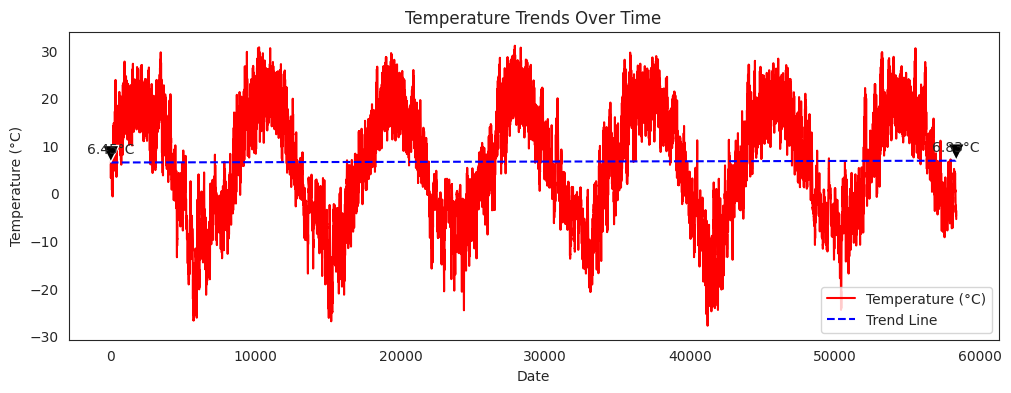

In [ ]:

# Assuming 'df_avg_weather' is your DataFrame and it's already set up with 'date_time_local' as the datetime index
# Convert index to a format that can be used in numerical calculations (if not already done)
x = np.arange(len(df_weather.index))

# Fit a linear trend line
z = np.polyfit(x, df_weather['Temp_avg'], 1)
p = np.poly1d(z)

# Plotting Temperature
plt.figure(figsize=(12, 4))
plt.plot(df_weather.index, df_weather['Temp_avg'], label='Temperature (°C)', color='red')
plt.plot(df_weather.index, p(x), label='Trend Line', linestyle='--', color='blue')

# Annotating the first and last temperatures on the trend line
first_year_temp = p(x[0])
last_year_temp = p(x[-1])
plt.annotate(f'{first_year_temp:.2f}°C', xy=(df_weather.index[0], first_year_temp), xytext=(df_weather.index[0], first_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'{last_year_temp:.2f}°C', xy=(df_weather.index[-1], last_year_temp), xytext=(df_weather.index[-1], last_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


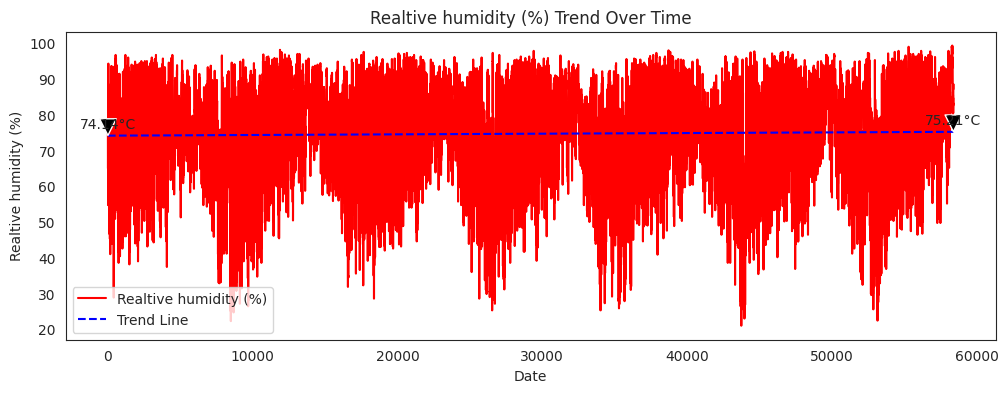

In [ ]:

# Assuming 'df_avg_weather' is your DataFrame and it's already set up with 'date_time_local' as the datetime index
# Convert index to a format that can be used in numerical calculations (if not already done)
x = np.arange(len(df_weather.index))

# Fit a linear trend line
z = np.polyfit(x, df_weather['RH_avg'], 1)
p = np.poly1d(z)

# Plotting Temperature
plt.figure(figsize=(12, 4))
plt.plot(df_weather.index, df_weather['RH_avg'], label='Realtive humidity (%)', color='red')
plt.plot(df_weather.index, p(x), label='Trend Line', linestyle='--', color='blue')

# Annotating the first and last temperatures on the trend line
first_year_temp = p(x[0])
last_year_temp = p(x[-1])
plt.annotate(f'{first_year_temp:.2f}°C', xy=(df_weather.index[0], first_year_temp), xytext=(df_weather.index[0], first_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'{last_year_temp:.2f}°C', xy=(df_weather.index[-1], last_year_temp), xytext=(df_weather.index[-1], last_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Realtive humidity (%) Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Realtive humidity (%)')
plt.legend()
plt.show()


## Loading dataset

In [ ]:
# mounting google drive and uploading the data
drive.mount('/content/saj')

Mounted at /content/saj


In [ ]:
df_3 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2003_v1.csv', skiprows=3)
df_4 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2004_v1.csv', skiprows=3)
df_5 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2005_v1.csv', skiprows=3)
df_6 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2006_v1.csv', skiprows=3)
df_7 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2007_v1.csv', skiprows=3)
df_8 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2008_v1.csv', skiprows=3)
df_9 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2009_v1.csv', skiprows=3)
df_10 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2010_v1.csv', skiprows=3)
df_11 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2011_v1.csv', skiprows=3)
df_12 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2012_v1.csv', skiprows=3)
df_13 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2013_v1.csv', skiprows=3)
df_14 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2014_v1.csv', skiprows=3)
df_15 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2015_v1.csv', skiprows=3)
df_16 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2016_v1.csv', skiprows=3)
df_17 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2017_v2.csv', skiprows=3)
df_18 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2018_v254.csv', skiprows=3)
df_19 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2019.csv', skiprows=3)
df_20 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2020.csv', skiprows=3)
df_21 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2021.csv', skiprows=3)
df_22 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2022.csv', skiprows=3)
df_23 = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/PUB_DemandZonal_2023.csv', skiprows=3)

In [ ]:
# Function to standardize date formats
def standardize_date(date):
    # Check if 'date' is a string and contains '/'
    if isinstance(date, str):
        if '/' in date:
            return pd.to_datetime(date, format='%Y/%m/%d')
        else:
            return pd.to_datetime(date, format='%Y-%m-%d')
    else:
        # If 'date' is not a string, assume it's already a datetime object and return it directly
        return date

In [ ]:
# Apply the function to the DataFrame
df_17['Date'] = df_17['Date'].apply(standardize_date)


In [ ]:
df_17.head(1)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2017-01-01,1,13522,493,1469,1025,1205,5694,1038,71,3010,466,1351,15822,"2,300"


In [ ]:

# Assuming df_3, df_4, ..., df_23 have been defined as you've loaded them from CSV files
dfs = [df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23]

# Use pd.concat to concatenate all dataframes in the list
df_energy = pd.concat(dfs, ignore_index=True)

In [ ]:
for i in dfs:
  i['Date'] = pd.to_datetime(i['Date'])


In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181200 entries, 0 to 181199
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            181200 non-null  object
 1   Hour            181200 non-null  int64 
 2   Ontario Demand  181200 non-null  int64 
 3   Northwest       181200 non-null  int64 
 4   Northeast       181200 non-null  int64 
 5   Ottawa          181200 non-null  int64 
 6   East            181200 non-null  int64 
 7   Toronto         181200 non-null  int64 
 8   Essa            181200 non-null  int64 
 9   Bruce           181200 non-null  int64 
 10  Southwest       181200 non-null  int64 
 11  Niagara         181200 non-null  int64 
 12  West            181200 non-null  int64 
 13  Zone Total      181200 non-null  int64 
 14  Diff            181200 non-null  object
dtypes: int64(13), object(2)
memory usage: 20.7+ MB


In [ ]:
# Convert 'Date' column to datetime
df_energy['Date'] = pd.to_datetime(df_energy['Date'])

# Convert 'Hour' to numeric, ensuring it is zero-based if needed (subtract 1 if starting from 1)
df_energy['Hour'] = pd.to_numeric(df_energy['Hour'], errors='coerce') - 1  # Adjust or remove "- 1" based on your hour indexing

# Handle any NaN values that may appear due to conversion errors
df_energy.dropna(subset=['Hour'], inplace=True)

# Create a new 'datetime' column combining 'Date' and 'Hour'
df_energy['datetime'] = df_energy['Date'] + pd.to_timedelta(df_energy['Hour'], unit='h')

In [ ]:
df_energy.drop('Date', axis=1, inplace=True)

In [ ]:
df_energy

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,datetime
0,0,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003-05-01 00:00:00
1,1,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003-05-01 01:00:00
2,2,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003-05-01 02:00:00
3,3,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003-05-01 03:00:00
4,4,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003-05-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181195,19,17114,630,1408,1151,1116,5852,1266,111,3261,548,1896,17240,127,2023-12-31 19:00:00
181196,20,16499,624,1387,1114,1077,5685,1201,110,3153,533,1812,16694,196,2023-12-31 20:00:00
181197,21,15939,622,1380,1075,1051,5504,1151,107,3068,513,1721,16193,254,2023-12-31 21:00:00
181198,22,15328,615,1393,1035,1015,5296,1097,104,2962,491,1602,15609,281,2023-12-31 22:00:00


## Merging two datasets

In [ ]:
df_weather.head(1)

,date_time_local,wind_speed_Toronto,relative_humidity_Toronto,dew_point_Toronto,temperature_tor,cloud_cover_8_Toronto,wind_speed_Ottawa,relative_humidity_Ottawa,dew_point_Ottawa,temperature_Ottawa,...,temperature_kincardin,wind_speed_chatamkanat,relative_humidity_chatamkanat,dew_point_chatamkanat,temperature_chatamkanat,cloud_cover_4,solar_radiation_chatamkanat,Temp_avg,RH_avg,cloud_cover_avg
0,2002-12-31 23:00:00,19.0,66.0,-5.3,0.3,6.0,26,71.0,-4.1,0.5,...,-0.5,13.0,82.0,5.5,9.4,1.0,934.0,-3.842857,75.285714,6.5


In [ ]:
print(len(df_energy))
print(len(df_weather))

181200
184080


In [ ]:
# Standardize the date column names
df_weather.rename(columns={'date_time_local': 'Date'}, inplace=True)
df_energy.rename(columns={'datetime': 'Date'}, inplace=True)

In [ ]:
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(df_energy, df_weather, on='Date', how='outer')

# Drop NaN values to remove the date range difference impact
merged_df.dropna(inplace=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181199 entries, 0 to 181198
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Hour                           181199 non-null  float64       
 1   Ontario Demand                 181199 non-null  float64       
 2   Northwest                      181199 non-null  float64       
 3   Northeast                      181199 non-null  float64       
 4   Ottawa                         181199 non-null  float64       
 5   East                           181199 non-null  float64       
 6   Toronto                        181199 non-null  float64       
 7   Essa                           181199 non-null  float64       
 8   Bruce                          181199 non-null  float64       
 9   Southwest                      181199 non-null  float64       
 10  Niagara                        181199 non-null  float64       
 11  

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

## calling the merged data

In [ ]:
# mounting google drive and uploading the data
drive.mount('/content/saj')

Mounted at /content/saj


In [ ]:
merged_df = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/merged_df.csv')

<ipython-input-6-6df250297026>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('/content/saj/MyDrive/DataElecOntario/ISO/merged_df.csv')


## specifying peak and non peak using a threshold

In [ ]:
df = merged_df[['Date','Temp_avg','RH_avg','cloud_cover_avg','Ontario Demand']]
df['Date'] = pd.to_datetime(df['Date'])
df

<ipython-input-7-aa334cab71f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0
...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0


In [ ]:
df1 = df.copy()
df1.set_index('Date', inplace=True)

In [ ]:
df1

,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand
Date,,,,
2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0
2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0
2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0
2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0
2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0
...,...,...,...,...
2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0
2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0
2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0


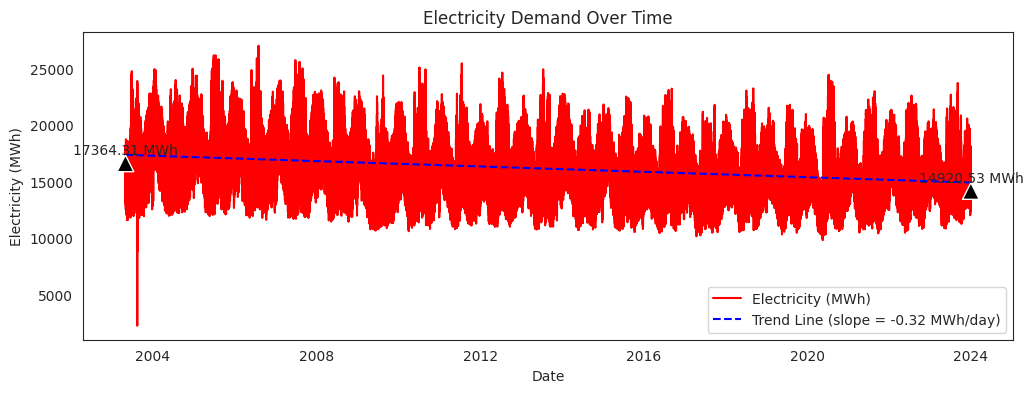

In [ ]:
# Convert datetime index to a numeric format by counting days from the start
x_numeric = (df1.index - df1.index[0]).days

# Fit a linear trend line
z = np.polyfit(x_numeric, df1['Ontario Demand'], 1)
p = np.poly1d(z)

# Extract the slope for labeling
slope = z[0]

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(df1.index, df1['Ontario Demand'], label='Electricity (MWh)', color='red')
plt.plot(df1.index, p(x_numeric), label=f'Trend Line (slope = {slope:.2f} MWh/day)', linestyle='--', color='blue')

# Annotating the first and last temperatures on the trend line
first_year_temp = p(x_numeric[0])
last_year_temp = p(x_numeric[-1])
plt.annotate(f'{first_year_temp:.2f} MWh', xy=(df1.index[0], first_year_temp), xytext=(df1.index[0], first_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'{last_year_temp:.2f} MWh', xy=(df1.index[-1], last_year_temp), xytext=(df1.index[-1], last_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Electricity Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity (MWh)')
plt.legend()
plt.show()

## removing the outlier from the data ( this is the Ontario elec demand, it cannot go toward zero Mwh) there must be a mistake in collecting data of 2003. so lets remove it.

In [ ]:
df_low = df[df['Ontario Demand'] <= 10000]
df_low

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand
2535,2003-08-14 15:00:00,28.914286,50.428571,6.50,6879.0
2536,2003-08-14 16:00:00,28.514286,52.285714,6.50,2270.0
2537,2003-08-14 17:00:00,27.928571,55.142857,6.50,2366.0
2538,2003-08-14 18:00:00,26.300000,61.571429,6.50,2365.0
2539,2003-08-14 19:00:00,23.928571,70.857143,6.50,2673.0
2540,2003-08-14 20:00:00,22.442857,77.571429,6.50,3480.0
2541,2003-08-14 21:00:00,21.785714,80.714286,6.50,4162.0
2542,2003-08-14 22:00:00,21.185714,83.428571,6.50,4737.0
2543,2003-08-14 23:00:00,20.457143,85.857143,6.50,5444.0
2544,2003-08-15 00:00:00,20.028571,86.857143,6.50,5812.0


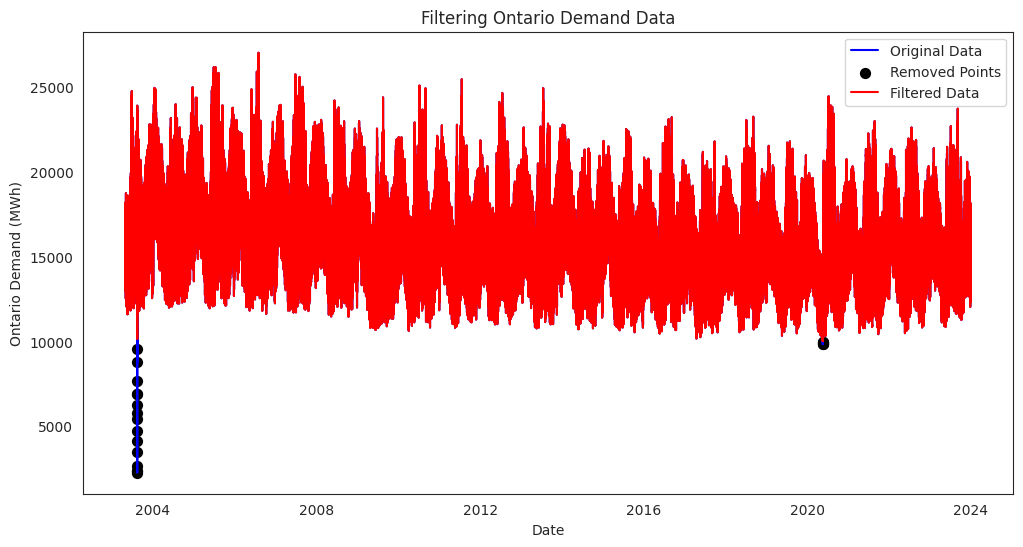

In [ ]:
# Filter out unrealistic low values (less than 500)
df_clean = df[df['Ontario Demand'] >= 10000]
# Plotting to compare
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ontario Demand'], 'b-', label='Original Data')
plt.scatter(df['Date'][df['Ontario Demand'] < 10000], df['Ontario Demand'][df['Ontario Demand'] < 10000], color='black', label='Removed Points', s=50)  # Highlight removed points
plt.plot(df_clean['Date'], df_clean['Ontario Demand'], 'r-', label='Filtered Data')
plt.title('Filtering Ontario Demand Data')
plt.xlabel('Date')
plt.ylabel('Ontario Demand (MWh)')
plt.legend()
plt.show()

In [ ]:
df_clean

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0
...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0


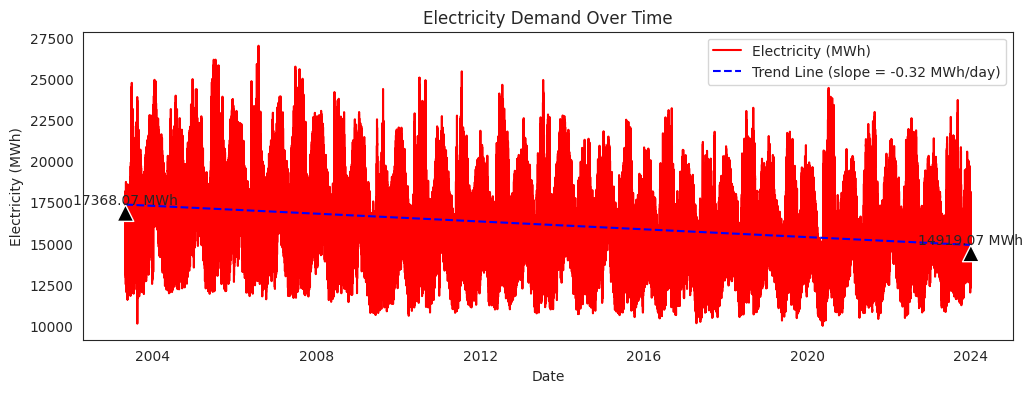

In [ ]:
df_draw = df_clean.copy()
df_draw.set_index('Date', inplace=True)

# Convert datetime index to a numeric format by counting days from the start
# Fix applied here: use .days attribute on each timedelta element
x_numeric = (df_draw.index - df_draw.index[0]).days

# Fit a linear trend line
z = np.polyfit(x_numeric, df_draw['Ontario Demand'], 1)
p = np.poly1d(z)

# Extract the slope for labeling
slope = z[0]

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(df_draw.index, df_draw['Ontario Demand'], label='Electricity (MWh)', color='red')
plt.plot(df_draw.index, p(x_numeric), label=f'Trend Line (slope = {slope:.2f} MWh/day)', linestyle='--', color='blue')

# Annotating the first and last temperatures on the trend line
first_year_temp = p(x_numeric[0])
last_year_temp = p(x_numeric[-1])
plt.annotate(f'{first_year_temp:.2f} MWh', xy=(df_draw.index[0], first_year_temp), xytext=(df_draw.index[0], first_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'{last_year_temp:.2f} MWh', xy=(df_draw.index[-1], last_year_temp), xytext=(df_draw.index[-1], last_year_temp + 2),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Electricity Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Electricity (MWh)')
plt.legend()
plt.show()


In [ ]:
df_clean

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0
...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0


In [ ]:
# Calculate the daily slope
z = np.polyfit(x_numeric, df_clean['Ontario Demand'], 1)
daily_slope = z[0]

# Convert daily slope to monthly, yearly, and seasonal slopes
slope_per_month = daily_slope * 30.44
slope_per_year = daily_slope * 365
slope_per_season = daily_slope * 91.25  # Assuming a season is approximately 3 months

# Print the results
print(f"Slope per day: {daily_slope:.4f} MWh/day")
print(f"Slope per month: {slope_per_month:.4f} MWh/month")
print(f"Slope per year: {slope_per_year:.4f} MWh/year")
print(f"Slope per season: {slope_per_season:.4f} MWh/season")

Slope per day: -0.3244 MWh/day
Slope per month: -9.8752 MWh/month
Slope per year: -118.4112 MWh/year
Slope per season: -29.6028 MWh/season


## what should be the threshold?

**As top five hour in each year does matter to us, I need a threshold that has a logic and give me at least the top five peak hour of each year, and id this thresold be naive it can recognize many hours as peak so for the upper limit lets using a number like 40 hours **
*   Varies every year and it is possibly increasing year by year
*   Notice that I also should define a window like 1-5 hours and see if the peak is within this window




What should be the threshold? 0.9 percentile of data / Zscore => 2 or ????

In [ ]:
from scipy.stats import zscore
# Calculate the z-scores and directly use them to create the 'peakDayStatus' column

df_all = df_clean.copy()
df_all['peakDayStatus'] = (zscore(df_all['Ontario Demand']) >= 2).astype(int).replace({1: 'Yes', 0: 'No'})

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all.loc[:, 'Year'] = df_all['Date'].dt.year



# Filter the DataFrame for rows where 'peakDayStatus' is 'Yes'
df_yes = df_all[df_all['peakDayStatus'] == 'Yes']

# Group by 'Year' and count the number of 'Yes' values in each year
peak_counts_per_year = df_yes.groupby('Year').size().reset_index(name='Count')

# Display the result
print(peak_counts_per_year)

    Year  Count
0   2003    204
1   2004    571
2   2005   1011
3   2006    455
4   2007    627
5   2008    287
6   2009    142
7   2010    304
8   2011    157
9   2012    221
10  2013    191
11  2014     82
12  2015     81
13  2016    145
14  2017      7
15  2018     62
16  2019     27
17  2020    138
18  2021    101
19  2022     58
20  2023     60


In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Year'] = df_clean['Date'].dt.year

# Function to calculate peak day status for a given threshold
def calculate_peak_status(demand_series, threshold):
    return (zscore(demand_series) >= threshold).astype(int).replace({1: 'Yes', 0: 'No'})

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame()

# Get unique years from the dataset
years = sorted(df_clean['Year'].unique())

# Loop through each year
for i, year in enumerate(years):
    # Get data for the current year
    current_year_data = df_clean[df_clean['Year'] == year].copy()

    if i == 0:
        # For the first year, calculate z-score threshold based on the that year data
        threshold = zscore(current_year_data['Ontario Demand']).quantile(0.98)
    else:
        # For subsequent years, calculate z-score threshold based on the previous year's data
        previous_year_data = df_clean[df_clean['Year'] == years[i-1]]
        threshold = zscore(previous_year_data['Ontario Demand']).quantile(0.98)

    # Calculate peak status for the current year
    current_year_data['peakDayStatus'] = calculate_peak_status(current_year_data['Ontario Demand'], threshold)

    # Append the current year data with peak status to the result DataFrame
    result_df = pd.concat([result_df, current_year_data])

# Drop the 'Year' column as it was only needed for the calculation
result_df.drop(columns=['Year'], inplace=True)

<ipython-input-19-cbc322af8c58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])
<ipython-input-19-cbc322af8c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Date'].dt.year


In [ ]:
from scipy.stats import zscore

# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
result_df['Date'] = pd.to_datetime(result_df['Date'])
result_df.loc[:, 'Year'] = result_df['Date'].dt.year

# Filter the DataFrame for rows where 'peakDayStatus' is 'Yes'
df_yes = result_df[result_df['peakDayStatus'] == 'Yes']

# Group by 'Year' and count the number of 'Yes' values in each year
peak_counts_per_year = df_yes.groupby('Year').size().reset_index(name='Count')

# Display the result
print(peak_counts_per_year)

    Year  Count
0   2003    118
1   2004    151
2   2005    247
3   2006    151
4   2007    167
5   2008    137
6   2009    243
7   2010    258
8   2011    105
9   2012    255
10  2013    159
11  2014     98
12  2015    253
13  2016    267
14  2017     55
15  2018    269
16  2019    161
17  2020    223
18  2021    209
19  2022     66
20  2023    180


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Convert 'Date' to datetime and extract 'Year'
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Year'] = df_clean['Date'].dt.year

# Function to calculate peak day status for a given threshold
def calculate_peak_status(demand_series, threshold):
    return (zscore(demand_series) >= threshold).astype(int).replace({1: 'Yes', 0: 'No'})

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame()

# Initialize a dictionary to store threshold values for each year
threshold_values = {}

# Get unique years from the dataset
years = sorted(df_clean['Year'].unique())

# Loop through each year
for i, year in enumerate(years):
    # Get data for the current year
    current_year_data = df_clean[df_clean['Year'] == year].copy()

    if i == 0:
        # For the first year, calculate z-score threshold based on that year's data
        threshold = zscore(current_year_data['Ontario Demand']).quantile(0.98)
    else:
        # For subsequent years, calculate z-score threshold based on the previous year's data
        previous_year_data = df_clean[df_clean['Year'] == years[i-1]]
        threshold = zscore(previous_year_data['Ontario Demand']).quantile(0.98)

    # Store the threshold value for the current year
    threshold_values[year] = threshold

    # Calculate peak status for the current year
    current_year_data['peakDayStatus'] = calculate_peak_status(current_year_data['Ontario Demand'], threshold)

    # Append the current year data with peak status to the result DataFrame
    result_df = pd.concat([result_df, current_year_data])

# Drop the 'Year' column as it was only needed for the calculation
result_df.drop(columns=['Year'], inplace=True)

# Display the threshold values for each year
threshold_values


<ipython-input-21-497db5b04033>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])
<ipython-input-21-497db5b04033>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Date'].dt.year


{2003: 2.057658287205394,
 2004: 2.057658287205394,
 2005: 2.008545159854742,
 2006: 2.161398124086532,
 2007: 2.044417818366032,
 2008: 2.0261108587954544,
 2009: 1.9370859813994796,
 2010: 2.0512025330329404,
 2011: 2.258644157244594,
 2012: 2.0409927570989628,
 2013: 2.257721015506012,
 2014: 2.202071436899661,
 2015: 2.0010449825913477,
 2016: 2.113826704484111,
 2017: 2.28036242486813,
 2018: 2.0312904798117475,
 2019: 2.1747108382410523,
 2020: 2.154216971921412,
 2021: 2.3084583306762076,
 2022: 2.3860430639776053,
 2023: 2.1000246779821645}

In [ ]:
result_df

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,peakDayStatus
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0,No
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0,No
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0,No
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0,No
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0,No
...,...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0,No
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0,No
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0,No
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0,No


## **3.3 Extracting hour, day of week and month from Dat with a fromat of yyyy-mm-dd-hh-mm-ss** <a class="anchor" id="3.3"></a>

[Table of Contents](#0.1)

In [ ]:
result_df

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,peakDayStatus
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0,No
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0,No
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0,No
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0,No
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0,No
...,...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0,No
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0,No
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0,No
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0,No


In [ ]:
def make_time_features(series):
    # Convert series to datetimes, handling NaN values gracefully
    times = pd.to_datetime(series, errors='coerce')

    # Extract time features
    hours = times.dt.hour.rename('Hour')
    dayofw = times.dt.dayofweek.rename('day')
    months = times.dt.month.rename('month')

    return hours, dayofw, months

# Assuming 'df.Time' is the column containing your datetime values
hour, day, month = make_time_features(df_clean['Date'])
hours, day, months = make_time_features(df_clean.Date)
df_clean = pd.concat([result_df, hours, day, months], axis=1)

In [ ]:
df_clean

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,peakDayStatus,Hour,day,month
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0,No,0,3,5
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0,No,1,3,5
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0,No,2,3,5
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0,No,3,3,5
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0,No,4,3,5
...,...,...,...,...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0,No,19,6,12
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0,No,20,6,12
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0,No,21,6,12
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0,No,22,6,12


0 represents Monday
1 represents Tuesday
2 represents Wednesday
3 represents Thursday
4 represents Friday
5 represents Saturday
6 represents Sunday

In [ ]:
df1 = df_clean.copy()
df1

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,peakDayStatus,Hour,day,month
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0,No,0,3,5
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0,No,1,3,5
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0,No,2,3,5
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0,No,3,3,5
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0,No,4,3,5
...,...,...,...,...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0,No,19,6,12
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0,No,20,6,12
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0,No,21,6,12
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0,No,22,6,12


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'] , utc = True)

In [ ]:
df1.head(25)

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,peakDayStatus,Hour,day,month
0,2003-05-01 00:00:00+00:00,6.514286,80.142857,6.5,13702.0,No,0,3,5
1,2003-05-01 01:00:00+00:00,5.914286,84.428571,6.5,13578.0,No,1,3,5
2,2003-05-01 02:00:00+00:00,5.971429,85.857143,6.5,13411.0,No,2,3,5
3,2003-05-01 03:00:00+00:00,5.500000,88.000000,6.5,13501.0,No,3,3,5
4,2003-05-01 04:00:00+00:00,5.542857,90.571429,6.5,14010.0,No,4,3,5
5,2003-05-01 05:00:00+00:00,6.057143,90.000000,6.5,15113.0,No,5,3,5
6,2003-05-01 06:00:00+00:00,6.800000,86.857143,6.5,16762.0,No,6,3,5
7,2003-05-01 07:00:00+00:00,6.885714,85.857143,6.5,17768.0,No,7,3,5
8,2003-05-01 08:00:00+00:00,6.942857,85.428571,6.5,18037.0,No,8,3,5
9,2003-05-01 09:00:00+00:00,7.671429,82.428571,6.5,18191.0,No,9,3,5


In [ ]:
# Shift all columns except 'peakDayStatus' by 24 rows
df_shifted = df1.drop('peakDayStatus', axis=1).shift(24)

# Re-attach the 'peakDayStatus' column from the original DataFrame
df_shifted['peakDayStatus'] = df1['peakDayStatus']

In [ ]:
df_shifted

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,Hour,day,month,peakDayStatus
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...
181194,2023-12-30 19:00:00+00:00,-3.657143,84.857143,8.00,17328.0,19.0,5.0,12.0,No
181195,2023-12-30 20:00:00+00:00,-3.757143,85.428571,8.00,16862.0,20.0,5.0,12.0,No
181196,2023-12-30 21:00:00+00:00,-3.785714,85.571429,8.00,16304.0,21.0,5.0,12.0,No
181197,2023-12-30 22:00:00+00:00,-3.700000,84.000000,7.75,15470.0,22.0,5.0,12.0,No


In [ ]:
# Handle NaN values that will appear due to the shift
df_shifted.dropna(inplace=True)

In [ ]:
df_shifted

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,Hour,day,month,peakDayStatus
24,2003-05-01 00:00:00+00:00,6.514286,80.142857,6.50,13702.0,0.0,3.0,5.0,No
25,2003-05-01 01:00:00+00:00,5.914286,84.428571,6.50,13578.0,1.0,3.0,5.0,No
26,2003-05-01 02:00:00+00:00,5.971429,85.857143,6.50,13411.0,2.0,3.0,5.0,No
27,2003-05-01 03:00:00+00:00,5.500000,88.000000,6.50,13501.0,3.0,3.0,5.0,No
28,2003-05-01 04:00:00+00:00,5.542857,90.571429,6.50,14010.0,4.0,3.0,5.0,No
...,...,...,...,...,...,...,...,...,...
181194,2023-12-30 19:00:00+00:00,-3.657143,84.857143,8.00,17328.0,19.0,5.0,12.0,No
181195,2023-12-30 20:00:00+00:00,-3.757143,85.428571,8.00,16862.0,20.0,5.0,12.0,No
181196,2023-12-30 21:00:00+00:00,-3.785714,85.571429,8.00,16304.0,21.0,5.0,12.0,No
181197,2023-12-30 22:00:00+00:00,-3.700000,84.000000,7.75,15470.0,22.0,5.0,12.0,No


In [ ]:
# Reset the index of the DataFrame
df_shifted.reset_index(drop=True, inplace=True)
df_shifted

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,Hour,day,month,peakDayStatus
0,2003-05-01 00:00:00+00:00,6.514286,80.142857,6.50,13702.0,0.0,3.0,5.0,No
1,2003-05-01 01:00:00+00:00,5.914286,84.428571,6.50,13578.0,1.0,3.0,5.0,No
2,2003-05-01 02:00:00+00:00,5.971429,85.857143,6.50,13411.0,2.0,3.0,5.0,No
3,2003-05-01 03:00:00+00:00,5.500000,88.000000,6.50,13501.0,3.0,3.0,5.0,No
4,2003-05-01 04:00:00+00:00,5.542857,90.571429,6.50,14010.0,4.0,3.0,5.0,No
...,...,...,...,...,...,...,...,...,...
181150,2023-12-30 19:00:00+00:00,-3.657143,84.857143,8.00,17328.0,19.0,5.0,12.0,No
181151,2023-12-30 20:00:00+00:00,-3.757143,85.428571,8.00,16862.0,20.0,5.0,12.0,No
181152,2023-12-30 21:00:00+00:00,-3.785714,85.571429,8.00,16304.0,21.0,5.0,12.0,No
181153,2023-12-30 22:00:00+00:00,-3.700000,84.000000,7.75,15470.0,22.0,5.0,12.0,No


In [ ]:
s_sc = df_shifted[['Ontario Demand','Temp_avg','cloud_cover_avg', 'Hour','day','month','peakDayStatus']]
s_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181155 entries, 0 to 181154
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Ontario Demand   181155 non-null  float64
 1   Temp_avg         181155 non-null  float64
 2   cloud_cover_avg  181155 non-null  float64
 3   Hour             181155 non-null  float64
 4   day              181155 non-null  float64
 5   month            181155 non-null  float64
 6   peakDayStatus    181155 non-null  object 
dtypes: float64(6), object(1)
memory usage: 9.7+ MB


## no imbalance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing functions
def split_data(series):
    """Splits input series into train, val, and test."""
    train_len = int(len(series) * 0.7)
    val_len = int(len(series) * 0.1)
    test_len = len(series) - train_len - val_len

    train_data = series[:train_len]
    val_data = series[train_len:train_len + val_len]
    test_data = series[train_len + val_len:]
    return train_data, val_data, test_data

def classification_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    Recall = TPR  # Recall is the same as True Positive Rate
    F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0  # F1 Score

    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "Recall": Recall,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }


In [ ]:
# Assume s_sc is your input series
train_multi, val_multi, test_multi = split_data(s_sc)

# Define categorical and numerical columns
categorical_col = 'peakDayStatus'

numerical_train = train_multi.drop(columns=[categorical_col])
numerical_val = val_multi.drop(columns=[categorical_col])
numerical_test = test_multi.drop(columns=[categorical_col])

In [ ]:
scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(numerical_train), columns=numerical_train.columns, index=numerical_train.index)
validation_scaled = pd.DataFrame(scaler.transform(numerical_val), columns=numerical_val.columns, index=numerical_val.index)
test_scaled = pd.DataFrame(scaler.transform(numerical_test), columns=numerical_test.columns, index=numerical_test.index)

train_scaled[categorical_col] = train_multi[categorical_col]
validation_scaled[categorical_col] = val_multi[categorical_col]
test_scaled[categorical_col] = test_multi[categorical_col]


In [ ]:
# Map categorical string values to integers
category_mapping = {'No': 0, 'Yes': 1}
train_scaled[categorical_col] = train_scaled[categorical_col].map(category_mapping)
validation_scaled[categorical_col] = validation_scaled[categorical_col].map(category_mapping)
test_scaled[categorical_col] = test_scaled[categorical_col].map(category_mapping)

In [ ]:
test_scaled

,Ontario Demand,Temp_avg,cloud_cover_avg,Hour,day,month,peakDayStatus
144923,0.255930,0.294267,0.90625,0.086957,0.166667,0.909091,0
144924,0.249763,0.296117,0.90625,0.130435,0.166667,0.909091,0
144925,0.255455,0.299122,0.87500,0.173913,0.166667,0.909091,0
144926,0.286646,0.297503,0.96875,0.217391,0.166667,0.909091,0
144927,0.365453,0.295423,1.00000,0.260870,0.166667,0.909091,0
...,...,...,...,...,...,...,...
181150,0.426174,0.418169,1.00000,0.826087,0.833333,1.000000,0
181151,0.398541,0.416551,1.00000,0.869565,0.833333,1.000000,0
181152,0.365453,0.416089,1.00000,0.913043,0.833333,1.000000,0
181153,0.315999,0.417476,0.96875,0.956522,0.833333,1.000000,0


In [ ]:
X_train = train_scaled.drop(columns=[categorical_col])
y_train = train_scaled[categorical_col]

X_test = test_scaled.drop(columns=[categorical_col])
y_test = test_scaled[categorical_col]

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    124147
           1       0.58      0.22      0.32      2661

    accuracy                           0.98    126808
   macro avg       0.78      0.61      0.65    126808
weighted avg       0.98      0.98      0.98    126808

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35548
           1       0.74      0.19      0.31       684

    accuracy                           0.98     36232
   macro avg       0.86      0.60      0.65     36232
weighted avg       0.98      0.98      0.98     36232

Confusion Matrix (Test Set):


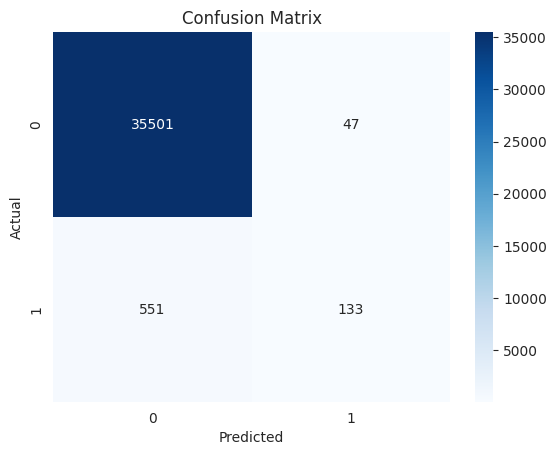

Accuracy for Training: 98.03%


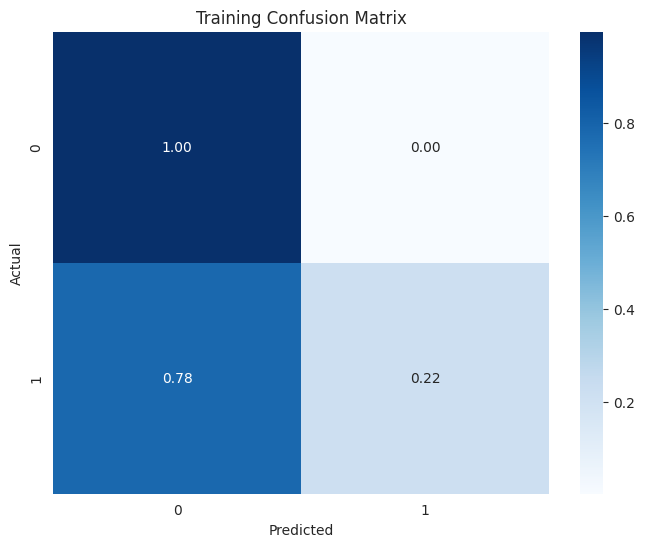

Accuracy for Test: 98.35%


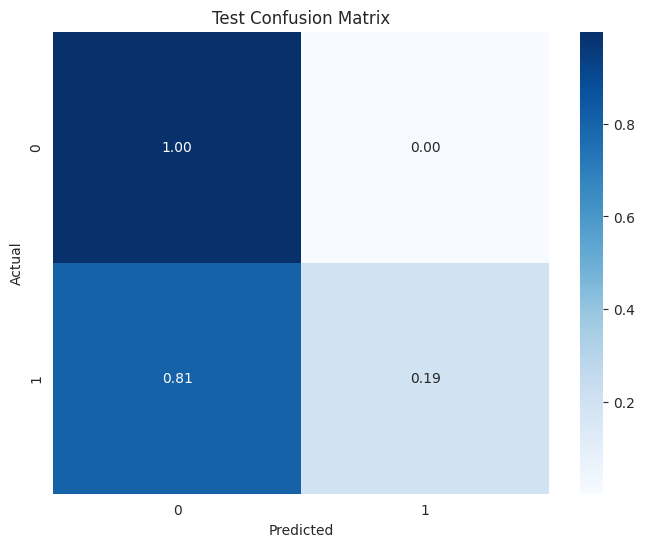

Training Metrics:
True Positive Rate (Recall): 0.22
False Positive Rate: 0.00
Precision: 0.58
Recall: 0.22
F1 Score: 0.32
True Positives: 584.00
False Positives: 415.00
False Negatives: 2077.00
True Negatives: 123732.00
Test Metrics:
True Positive Rate (Recall): 0.19
False Positive Rate: 0.00
Precision: 0.74
Recall: 0.19
F1 Score: 0.31
True Positives: 133.00
False Positives: 47.00
False Negatives: 551.00
True Negatives: 35501.00


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy for {}: {:.2f}%".format(name, accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

train_preds = predict_and_plot(X_train, y_train, 'Training')
test_preds = predict_and_plot(X_test, y_test, 'Test')

# Calculate metrics using the classification_metrics function
train_metrics = classification_metrics(y_train, y_pred_train)
test_metrics = classification_metrics(y_test, y_pred_test)

print("Training Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.2f}")

print("Test Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")


## noimbalance using random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.combine import SMOTEENN

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124147
           1       1.00      1.00      1.00      2661

    accuracy                           1.00    126808
   macro avg       1.00      1.00      1.00    126808
weighted avg       1.00      1.00      1.00    126808

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35548
           1       0.68      0.46      0.55       684

    accuracy                           0.99     36232
   macro avg       0.84      0.73      0.77     36232
weighted avg       0.98      0.99      0.98     36232

Confusion Matrix (Test Set):


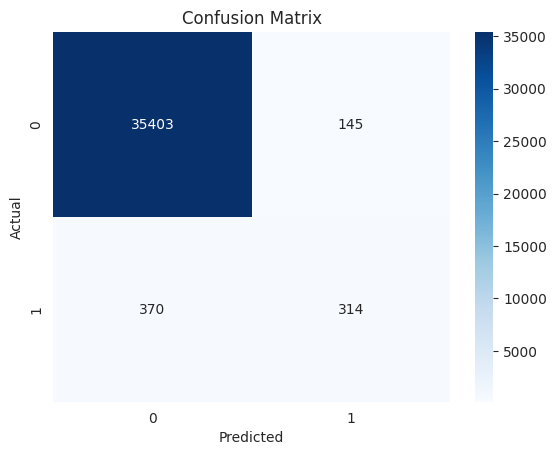

Accuracy for Training: 100.00%


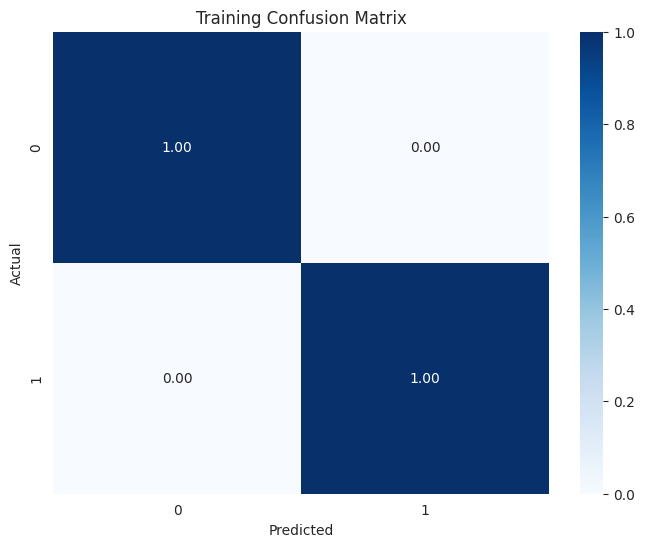

Accuracy for Test: 98.58%


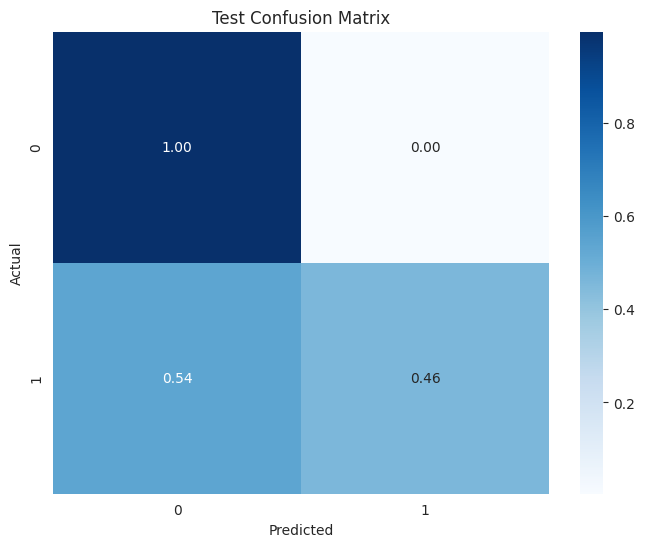

Test Metrics:
True Positive Rate (Recall): 0.46
False Positive Rate: 0.00
Precision: 0.68
F1 Score: 0.55
True Positives: 314.00
False Positives: 145.00
False Negatives: 370.00
True Negatives: 35403.00


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy for {}: {:.2f}%".format(name, accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

train_preds = predict_and_plot(X_train, y_train, 'Training')
test_preds = predict_and_plot(X_test, y_test, 'Test')

# Calculate metrics using the classification_metrics function
train_metrics = classification_metrics(y_train, y_pred_train)
test_metrics = classification_metrics(y_test, y_pred_test)


print("Test Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")


## using imbalance method

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.combine import SMOTEENN


In [ ]:
# Assume s_sc is your input series
train_multi, val_multi, test_multi = split_data(s_sc)

# Define categorical and numerical columns
categorical_col = 'peakDayStatus'  # Change this to your categorical column name

numerical_train = train_multi.drop(columns=[categorical_col])
numerical_val = val_multi.drop(columns=[categorical_col])
numerical_test = test_multi.drop(columns=[categorical_col])

scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(numerical_train), columns=numerical_train.columns, index=numerical_train.index)
validation_scaled = pd.DataFrame(scaler.transform(numerical_val), columns=numerical_val.columns, index=numerical_val.index)
test_scaled = pd.DataFrame(scaler.transform(numerical_test), columns=numerical_test.columns, index=numerical_test.index)

train_scaled[categorical_col] = train_multi[categorical_col]
validation_scaled[categorical_col] = val_multi[categorical_col]
test_scaled[categorical_col] = test_multi[categorical_col]

# Map categorical string values to integers
category_mapping = {'No': 0.0, 'Yes': 1.0}
train_scaled[categorical_col] = train_scaled[categorical_col].map(category_mapping)
validation_scaled[categorical_col] = validation_scaled[categorical_col].map(category_mapping)
test_scaled[categorical_col] = test_scaled[categorical_col].map(category_mapping)

X_train = train_scaled.drop(columns=[categorical_col])
y_train = train_scaled[categorical_col]

X_test = test_scaled.drop(columns=[categorical_col])
y_test = test_scaled[categorical_col]

Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    124147
         1.0       0.53      1.00      0.69      2661

    accuracy                           0.98    126808
   macro avg       0.76      0.99      0.84    126808
weighted avg       0.99      0.98      0.98    126808

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     35548
         1.0       0.47      0.74      0.57       684

    accuracy                           0.98     36232
   macro avg       0.73      0.86      0.78     36232
weighted avg       0.99      0.98      0.98     36232

Confusion Matrix (Test Set):


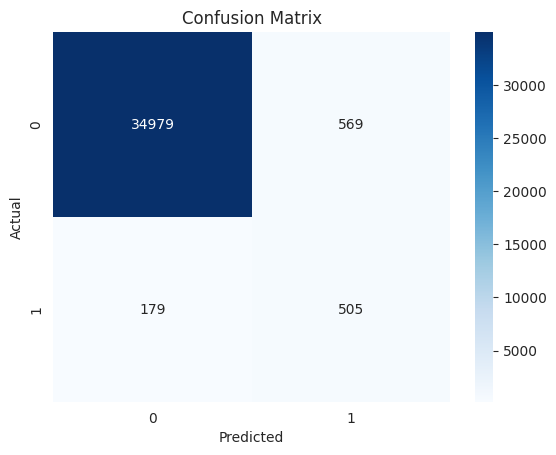

Accuracy for Training: 98.11%


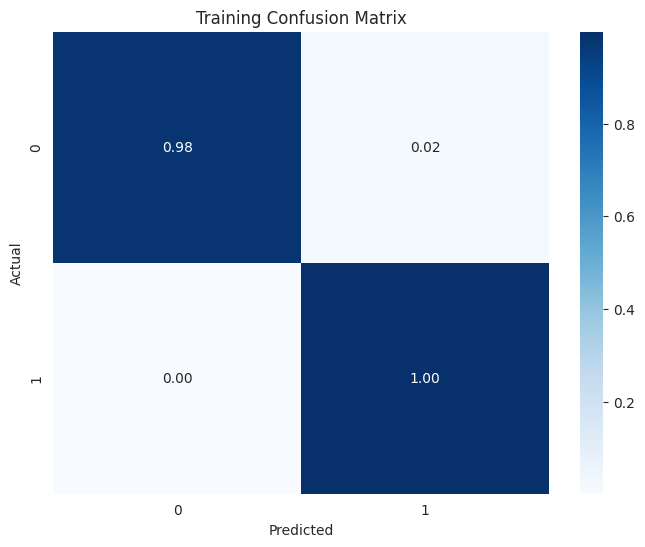

Accuracy for Test: 97.94%


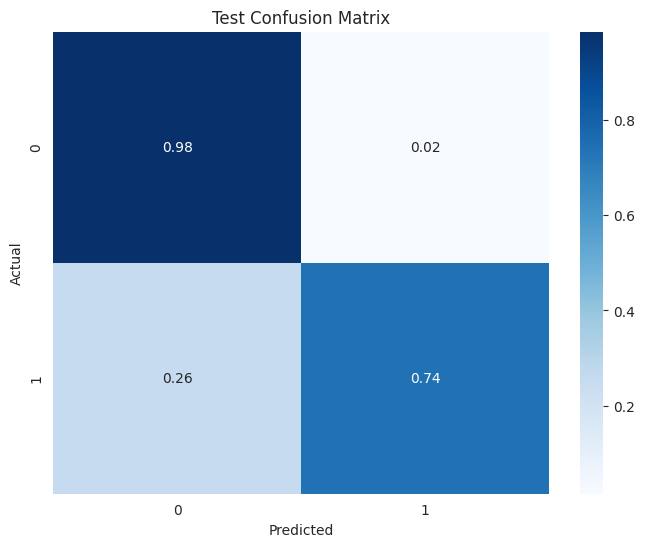

Test Metrics:
True Positive Rate (Recall): 0.74
False Positive Rate: 0.02
Precision: 0.47
F1 Score: 0.57
True Positives: 505.00
False Positives: 569.00
False Negatives: 179.00
True Negatives: 34979.00


In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy for {}: {:.2f}%".format(name, accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

train_preds = predict_and_plot(X_train, y_train, 'Training')
test_preds = predict_and_plot(X_test, y_test, 'Test')

# Calculate metrics using the classification_metrics function
train_metrics = classification_metrics(y_train, y_pred_train)
test_metrics = classification_metrics(y_test, y_pred_test)


print("Test Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    124147
           1       0.15      0.92      0.26      2661

    accuracy                           0.89    126808
   macro avg       0.57      0.90      0.60    126808
weighted avg       0.98      0.89      0.93    126808

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     35548
           1       0.23      0.91      0.37       684

    accuracy                           0.94     36232
   macro avg       0.61      0.93      0.67     36232
weighted avg       0.98      0.94      0.96     36232

Confusion Matrix (Test Set):


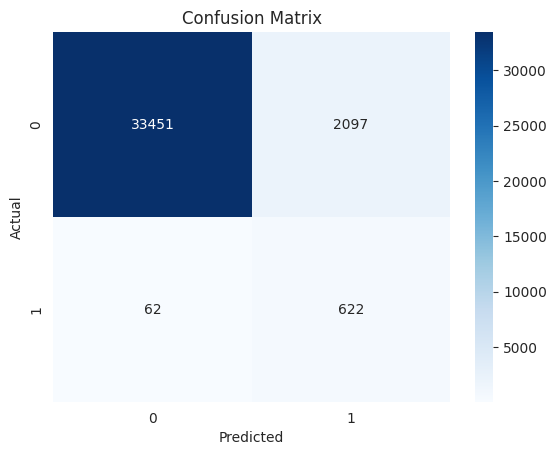

Accuracy for Training: 88.88%


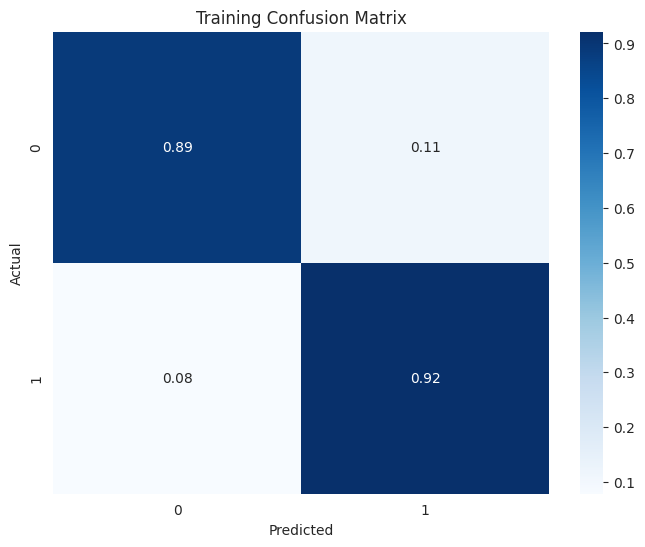

Accuracy for Test: 94.04%


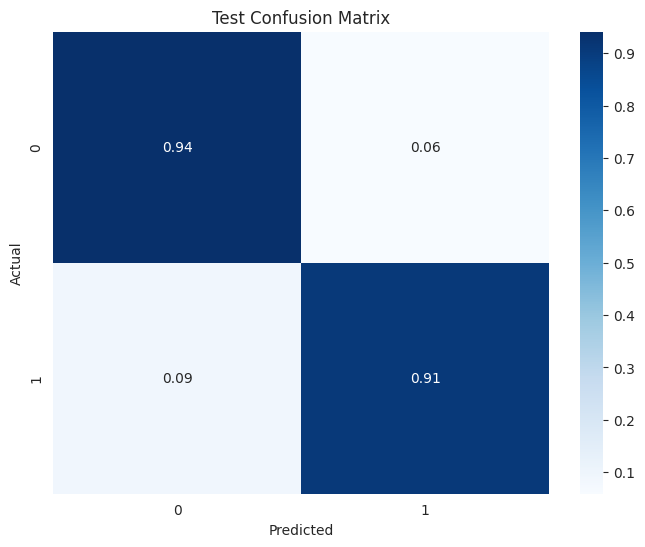

Training Metrics:
True Positive Rate (Recall): 0.92
False Positive Rate: 0.11
Precision: 0.15
F1 Score: 0.26
True Positives: 2452.00
False Positives: 13892.00
False Negatives: 209.00
True Negatives: 110255.00
Test Metrics:
True Positive Rate (Recall): 0.91
False Positive Rate: 0.06
Precision: 0.23
F1 Score: 0.37
True Positives: 622.00
False Positives: 2097.00
False Negatives: 62.00
True Negatives: 33451.00


In [ ]:
# Assume s_sc is your input series
train_multi, val_multi, test_multi = split_data(s_sc)

# Define categorical and numerical columns
categorical_col = 'peakDayStatus'  # Change this to your categorical column name

numerical_train = train_multi.drop(columns=[categorical_col])
numerical_val = val_multi.drop(columns=[categorical_col])
numerical_test = test_multi.drop(columns=[categorical_col])

scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(numerical_train), columns=numerical_train.columns, index=numerical_train.index)
validation_scaled = pd.DataFrame(scaler.transform(numerical_val), columns=numerical_val.columns, index=numerical_val.index)
test_scaled = pd.DataFrame(scaler.transform(numerical_test), columns=numerical_test.columns, index=numerical_test.index)

train_scaled[categorical_col] = train_multi[categorical_col]
validation_scaled[categorical_col] = val_multi[categorical_col]
test_scaled[categorical_col] = test_multi[categorical_col]

# Map categorical string values to integers
category_mapping = {'No': 0, 'Yes': 1}  # Change this mapping according to your data
train_scaled[categorical_col] = train_scaled[categorical_col].map(category_mapping)
validation_scaled[categorical_col] = validation_scaled[categorical_col].map(category_mapping)
test_scaled[categorical_col] = test_scaled[categorical_col].map(category_mapping)

X_train = train_scaled.drop(columns=[categorical_col])
y_train = train_scaled[categorical_col]

X_test = test_scaled.drop(columns=[categorical_col])
y_test = test_scaled[categorical_col]

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy for {}: {:.2f}%".format(name, accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

train_preds = predict_and_plot(X_train, y_train, 'Training')
test_preds = predict_and_plot(X_test, y_test, 'Test')

# Calculate metrics using the classification_metrics function
train_metrics = classification_metrics(y_train, y_pred_train)
test_metrics = classification_metrics(y_test, y_pred_test)

print("Training Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.2f}")

print("Test Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")

## Using imbalance method + random forest

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    124147
           1       0.53      1.00      0.69      2661

    accuracy                           0.98    126808
   macro avg       0.76      0.99      0.84    126808
weighted avg       0.99      0.98      0.98    126808

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     35548
           1       0.47      0.74      0.57       684

    accuracy                           0.98     36232
   macro avg       0.73      0.86      0.78     36232
weighted avg       0.99      0.98      0.98     36232

Confusion Matrix (Test Set):


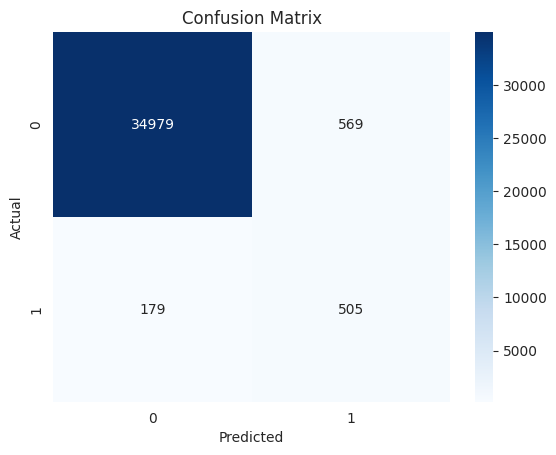

Accuracy for Training: 98.11%


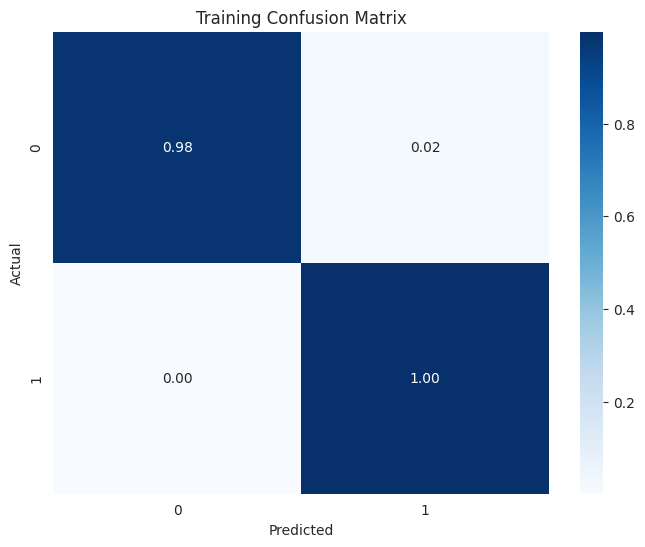

Accuracy for Test: 97.94%


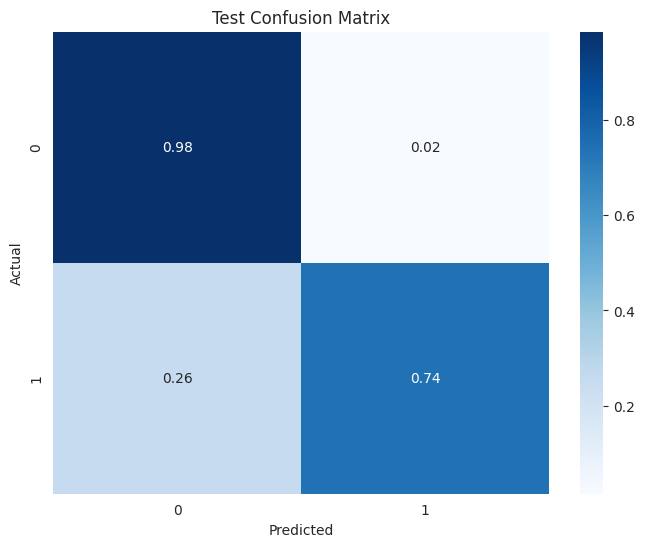

Training Metrics:
accuracy: 0.98
precision: 0.99
recall: 0.98
f1_score: 0.98
Test Metrics:
accuracy: 0.98
precision: 0.99
recall: 0.98
f1_score: 0.98


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# Assume s_sc is your input series
train_multi, val_multi, test_multi = split_data(s_sc)

# Define categorical and numerical columns
categorical_col = 'peakDayStatus'  # Change this to your categorical column name

numerical_train = train_multi.drop(columns=[categorical_col])
numerical_val = val_multi.drop(columns=[categorical_col])
numerical_test = test_multi.drop(columns=[categorical_col])

scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(numerical_train), columns=numerical_train.columns, index=numerical_train.index)
validation_scaled = pd.DataFrame(scaler.transform(numerical_val), columns=numerical_val.columns, index=numerical_val.index)
test_scaled = pd.DataFrame(scaler.transform(numerical_test), columns=numerical_test.columns, index=numerical_test.index)

train_scaled[categorical_col] = train_multi[categorical_col]
validation_scaled[categorical_col] = val_multi[categorical_col]
test_scaled[categorical_col] = test_multi[categorical_col]

# Map categorical string values to integers
category_mapping = {'No': 0, 'Yes': 1}  # Change this mapping according to your data
train_scaled[categorical_col] = train_scaled[categorical_col].map(category_mapping)
validation_scaled[categorical_col] = validation_scaled[categorical_col].map(category_mapping)
test_scaled[categorical_col] = test_scaled[categorical_col].map(category_mapping)

X_train = train_scaled.drop(columns=[categorical_col])
y_train = train_scaled[categorical_col]

X_test = test_scaled.drop(columns=[categorical_col])
y_test = test_scaled[categorical_col]

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Test Set):")
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy for {}: {:.2f}%".format(name, accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

train_preds = predict_and_plot(X_train, y_train, 'Training')
test_preds = predict_and_plot(X_test, y_test, 'Test')

# Define a function to calculate classification metrics
def classification_metrics(y_true, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1_score': f1_score(y_true, y_pred, average='weighted')
    }
    return metrics

# Calculate metrics using the classification_metrics function
train_metrics = classification_metrics(y_train, y_pred_train)
test_metrics = classification_metrics(y_test, y_pred_test)

print("Training Metrics:")
for key, value in train_metrics.items():
    print(f"{key}: {value:.2f}")

print("Test Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.2f}")


## test our model on Manual inputs

In [ ]:
import pandas as pd

# Assume this is your hand-picked data in a dictionary format
hand_picked_dict = {
    'feature1': [0.1, 0.2, 0.3],
    'feature2': [0.4, 0.5, 0.6],
    'feature3': [0.7, 0.8, 0.9],
    # Add all the necessary features as per your model's requirements
}

# Convert the dictionary into a DataFrame
hand_picked_df = pd.DataFrame(hand_picked_dict)

# Scale the hand-picked data using the scaler you fit on your training data
hand_picked_scaled = pd.DataFrame(scaler.transform(hand_picked_df),
                                  columns=hand_picked_df.columns,
                                  index=hand_picked_df.index)

# Get predictions using your model
hand_picked_preds = model.predict(hand_picked_scaled)

# If you have the true labels for this data, you can evaluate the model's performance
# Assuming 'hand_picked_labels' is a list or series of true labels
hand_picked_labels = [0, 1, 0]  # Replace with actual labels if you have them

# Calculate and print metrics if true labels are available
hand_picked_metrics = classification_metrics(hand_picked_labels, hand_picked_preds)

print("Hand-Picked Data Predictions:", hand_picked_preds)
print("Hand-Picked Data Metrics:")
for key, value in hand_picked_metrics.items():
    print(f"{key}: {value:.2f}")

# If you want to visualize the confusion matrix
cf = confusion_matrix(hand_picked_labels, hand_picked_preds, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Hand-Picked Data Confusion Matrix')
plt.show()


# other methods that I test but perfrom not good and I might work more on them in the future

## m

In [ ]:
"""
import pandas as pd
from scipy.stats import zscore

# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Year'] = df_clean['Date'].dt.year

# Function to calculate peak day status for a given threshold
def calculate_peak_status(demand_series, threshold):
    return (zscore(demand_series) >= threshold).astype(int).replace({1: 'Yes', 0: 'No'})

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame()

# Get unique years from the dataset
years = sorted(df_clean['Year'].unique())

# Loop through each year
for year in years:
    # Get data for the current year
    current_year_data = df_clean[df_clean['Year'] == year].copy()

    # Use a fixed z-score threshold of 2
    threshold = 2

    # Calculate peak status for the current year
    current_year_data['peakDayStatus'] = calculate_peak_status(current_year_data['Ontario Demand'], threshold)

    # Append the current year data with peak status to the result DataFrame
    result_df = pd.concat([result_df, current_year_data])

# Drop the 'Year' column as it was only needed for the calculation
result_df.drop(columns=['Year'], inplace=True)



# not a good method
from scipy.stats import zscore
# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Year'] = df_clean['Date'].dt.year

# Function to calculate peak day status for a given threshold
def calculate_peak_status(demand_series, threshold):
    return (zscore(demand_series) >= threshold).astype(int).replace({1: 'Yes', 0: 'No'})

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame()

# Get unique years from the dataset
years = sorted(df_clean['Year'].unique())

# Loop through each year
for i, year in enumerate(years):
    # Get data for the current year

    if i == 0:
        # For the first year, calculate z-score threshold based on the that year data
        threshold = 2
        year12 = df_clean[df_clean['Year'] == year].copy()
          # Calculate peak status for the current year
        year12['peakDayStatus'] = calculate_peak_status(year12['Ontario Demand'], threshold)

    else:
        # For subsequent years, calculate z-score threshold based on the previous year's data
        year1 = df_clean[df_clean['Year'] == years[i-1]]
    # Append the current year data with peak status to the result DataFrame
    result_df = pd.concat([result_df, year12])

# Drop the 'Year' column as it was only needed for the calculation
result_df.drop(columns=['Year'], inplace=True)



from scipy.stats import zscore

# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
result_df['Date'] = pd.to_datetime(result_df['Date'])
result_df.loc[:, 'Year'] = result_df['Date'].dt.year

# Filter the DataFrame for rows where 'peakDayStatus' is 'Yes'
df_yes = result_df[result_df['peakDayStatus'] == 'Yes']

# Group by 'Year' and count the number of 'Yes' values in each year
peak_counts_per_year = df_yes.groupby('Year').size().reset_index(name='Count')

# Display the result
print(peak_counts_per_year)

## threshold using the forecasted value

In [ ]:
# Load the data
df = df_clean.copy()
dff = df[['Ontario Demand','Date']]
dff

,Ontario Demand,Date
0,13702.0,2003-05-01 00:00:00
1,13578.0,2003-05-01 01:00:00
2,13411.0,2003-05-01 02:00:00
3,13501.0,2003-05-01 03:00:00
4,14010.0,2003-05-01 04:00:00
...,...,...
181194,17114.0,2023-12-31 19:00:00
181195,16499.0,2023-12-31 20:00:00
181196,15939.0,2023-12-31 21:00:00
181197,15328.0,2023-12-31 22:00:00


In [ ]:
# Set the 'DateTime' column as the index
dff.set_index('Date', inplace=True)
# Ensure the data is sorted by datetime
dff = dff.sort_index()
dff

,Ontario Demand
Date,
2003-05-01 00:00:00,13702.0
2003-05-01 01:00:00,13578.0
2003-05-01 02:00:00,13411.0
2003-05-01 03:00:00,13501.0
2003-05-01 04:00:00,14010.0
...,...
2023-12-31 19:00:00,17114.0
2023-12-31 20:00:00,16499.0
2023-12-31 21:00:00,15939.0


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00


In [ ]:
dff

,Ontario Demand
Date,
2003-05-01 00:00:00,13702.0
2003-05-01 01:00:00,13578.0
2003-05-01 02:00:00,13411.0
2003-05-01 03:00:00,13501.0
2003-05-01 04:00:00,14010.0
...,...
2023-12-31 19:00:00,17114.0
2023-12-31 20:00:00,16499.0
2023-12-31 21:00:00,15939.0


In [ ]:
from pmdarima import auto_arima
# Function to forecast the next year's demand
def forecast_demand(train_data, periods=365*24):
    model = auto_arima(train_data, seasonal=True, m=24)
    forecast = model.predict(n_periods=periods)
    return forecast

# Function to classify peaks based on the threshold
def classify_peaks(df, forecast, year, threshold):
    forecast_index = pd.date_range(start=f'{year}-01-01', periods=len(forecast), freq='H')
    df_forecast = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecasted Demand'])
    df_forecast['Z-score'] = zscore(df_forecast['Forecasted Demand'])
    threshold_value = df_forecast['Forecasted Demand'][df_forecast['Z-score'] >= threshold].min()
    df.loc[(df.index.year == year) & (df['Ontario Demand'] >= threshold_value), 'peakDayStatus'] = 'Yes'
    return df, df_forecast, threshold_value

# Initialize the peakDayStatus column
dff['peakDayStatus'] = 'No'
# Iterate over the years to forecast and classify
years = dff.index.year.unique()
for i in range(1, len(years)):
    previous_year = years[i-1]
    current_year = years[i]
    train_data = dff[dff.index.year == previous_year]['Ontario Demand']

    # Forecast the next year's demand
    forecasted_values = forecast_demand(train_data)

    # Classify peaks for the current year based on forecasted values
    dff, dff_forecast, threshold_value = classify_peaks(df, forecasted_values, current_year, 2.5)
    print(f"Year: {current_year}, Threshold: {threshold_value}")

# For the first year, use its data and z-score on that year
first_year = years[0]
df_first_year = dff[dff.index.year == first_year]
df_first_year['Z-score'] = zscore(df_first_year['Ontario Demand'])
threshold_first_year = df_first_year['Ontario Demand'][df_first_year['Z-score'] >= 2.5].min()
dff.loc[(df.index.year == first_year) & (df['Ontario Demand'] >= threshold_first_year), 'peakDayStatus'] = 'Yes'

# Plotting the forecasted values and the real values for a sample year (e.g., 2004)
plt.figure(figsize=(14, 7))
plt.plot(df[df.index.year == 2004]['Ontario Demand'], label='Real Demand 2004')
plt.plot(df_forecast['Forecasted Demand'], label='Forecasted Demand 2004', linestyle='--')
plt.axhline(y=threshold_value, color='r', linestyle=':', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Real vs Forecasted Demand for 2004')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from pmdarima import auto_arima
from scipy.stats import zscore
import matplotlib.pyplot as plt


# Function to forecast the next year's demand
def forecast_demand(train_data, periods=365*24):
    model = auto_arima(train_data, seasonal=True, m=24)
    forecast = model.predict(n_periods=periods)
    return forecast

# Function to classify peaks based on the threshold
def classify_peaks(df, forecast, year, threshold):
    forecast_index = pd.date_range(start=f'{year}-01-01', periods=len(forecast), freq='H')
    df_forecast = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecasted Demand'])
    df_forecast['Z-score'] = zscore(df_forecast['Forecasted Demand'])
    threshold_value = df_forecast['Forecasted Demand'][df_forecast['Z-score'] >= threshold].min()
    df.loc[(df.index.year == year) & (df['Ontario Demand'] >= threshold_value), 'peakDayStatus'] = 'Yes'
    return df, df_forecast, threshold_value

# Initialize the peakDayStatus column
dff['peakDayStatus'] = 'No'

# Iterate over the years to forecast and classify
years = df.index.year.unique()
for i in range(1, len(years)):
    previous_year = years[i-1]
    current_year = years[i]
    train_data = df[df.index.year == previous_year]['Ontario Demand']

    # Forecast the next year's demand
    forecasted_values = forecast_demand(train_data)

    # Classify peaks for the current year based on forecasted values
    df, df_forecast, threshold_value = classify_peaks(df, forecasted_values, current_year, 2.5)
    print(f"Year: {current_year}, Threshold: {threshold_value}")

# For the first year, use its data and z-score on that year
first_year = years[0]
df_first_year = df[df.index.year == first_year]
df_first_year['Z-score'] = zscore(df_first_year['Ontario Demand'])
threshold_first_year = df_first_year['Ontario Demand'][df_first_year['Z-score'] >= 2.5].min()
df.loc[(df.index.year == first_year) & (df['Ontario Demand'] >= threshold_first_year), 'peakDayStatus'] = 'Yes'

# Plotting the forecasted values and the real values for a sample year (e.g., 2004)
plt.figure(figsize=(14, 7))
plt.plot(df[df.index.year == 2004]['Ontario Demand'], label='Real Demand 2004')
plt.plot(df_forecast['Forecasted Demand'], label='Forecasted Demand 2004', linestyle='--')
plt.axhline(y=threshold_value, color='r', linestyle=':', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Real vs Forecasted Demand for 2004')
plt.legend()
plt.show()


In [ ]:
train_data_2003 = dff['2003']['Ontario Demand']

In [ ]:
# Example forecast for the year 2004 using 2003 data
train_data_2003 = dff['2003']['Ontario Demand']
forecast_2004 = forecast_demand(train_data_2003)

# Create a DataFrame for the forecasted values
forecast_index_2004 = pd.date_range(start='2004-01-01', periods=len(forecast_2004), freq='H')
df_forecast_2004 = pd.DataFrame(data=forecast_2004, index=forecast_index_2004, columns=['Forecasted Demand'])

# Calculate z-scores for the forecasted values
df_forecast_2004['Z-score'] = zscore(df_forecast_2004['Forecasted Demand'])

# Set the threshold for z-score >= 2.5
threshold_2004 = df_forecast_2004['Forecasted Demand'][df_forecast_2004['Z-score'] >= 2.5].min()

# Classify the real 2004 data based on the threshold
df['peakDayStatus'] = 'No'
df.loc[(df.index.year == 2004) & (df['Ontario Demand'] >= threshold_2004), 'peakDayStatus'] = 'Yes'

# Plotting the forecasted values and the real values for 2004
plt.figure(figsize=(14, 7))
plt.plot(df['2004']['Ontario Demand'], label='Real Demand 2004')
plt.plot(df_forecast_2004['Forecasted Demand'], label='Forecasted Demand 2004', linestyle='--')
plt.axhline(y=threshold_2004, color='r', linestyle=':', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Real vs Forecasted Demand for 2004')
plt.legend()
plt.show()


Slope per day: -0.3244 MWh/day
Slope per month: -9.8752 MWh/month
Slope per year: -118.4112 MWh/year
Slope per season: -29.6028 MWh/season

In [ ]:
# Assuming df_clean is your DataFrame and it has a 'Date' column in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean.loc[:, 'Year'] = df_clean['Date'].dt.year

# Function to calculate peak day status for a given threshold
def calculate_peak_status(demand_series, threshold):
    return (demand_series >= threshold).astype(int).replace({1: 'Yes', 0: 'No'})

# Initialize an empty DataFrame to store results
result_df = pd.DataFrame()

# Get unique years from the dataset
years = sorted(df_clean['Year'].unique())

# Desired range of peak hours
min_peak_hours = 20
max_peak_hours = 40

# Loop through each year
for i, year in enumerate(years):
    # Get data for the current year
    current_year_data = df_clean[df_clean['Year'] == year].copy()

    # Calculate z-scores for the current year's demand
    z_scores = zscore(current_year_data['Ontario Demand'])

    # Initialize threshold and step size for adjustment
    threshold = 2.5
    step_size = 0.1

    # Calculate initial peak status
    peak_status = calculate_peak_status(z_scores, threshold)
    count_yes = peak_status.value_counts().get('Yes', 0)

    # Adjust threshold iteratively to get the count between 20 and 40
    while count_yes < min_peak_hours or count_yes > max_peak_hours:
        if count_yes < min_peak_hours:
            threshold -= step_size
        elif count_yes > max_peak_hours:
            threshold += step_size

        peak_status = calculate_peak_status(z_scores, threshold)
        count_yes = peak_status.value_counts().get('Yes', 0)

    # Assign peak status to current year data
    current_year_data['peakDayStatus'] = peak_status

    # Append the current year data with peak status to the result DataFrame
    result_df = pd.concat([result_df, current_year_data])

<ipython-input-50-0990cd8ab573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


In [ ]:
# Drop the 'Year' column as it was only needed for the calculation
result_df.drop(columns=['Year'], inplace=True)

# Update the original DataFrame with the calculated peakDayStatus
df_clean['peakDayStatus'] = result_df['peakDayStatus']

# Now df_clean contains the 'peakDayStatus' column with the specified logic

# Filter the DataFrame for rows where 'peakDayStatus' is 'Yes'
df_yes = df_clean[df_clean['peakDayStatus'] == 'Yes']

# Group by 'Year' and count the number of 'Yes' values in each year
peak_counts_per_year = df_yes.groupby('Year').size().reset_index(name='Count')

# Display the result
print(peak_counts_per_year)


In [ ]:
df_clean

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,Year,peakDayStatus
0,2003-05-01 00:00:00,6.514286,80.142857,6.50,13702.0,2003,No
1,2003-05-01 01:00:00,5.914286,84.428571,6.50,13578.0,2003,No
2,2003-05-01 02:00:00,5.971429,85.857143,6.50,13411.0,2003,No
3,2003-05-01 03:00:00,5.500000,88.000000,6.50,13501.0,2003,No
4,2003-05-01 04:00:00,5.542857,90.571429,6.50,14010.0,2003,No
...,...,...,...,...,...,...,...
181194,2023-12-31 19:00:00,-4.557143,87.142857,8.00,17114.0,2023,No
181195,2023-12-31 20:00:00,-4.714286,87.285714,6.25,16499.0,2023,No
181196,2023-12-31 21:00:00,-5.200000,88.000000,5.75,15939.0,2023,No
181197,2023-12-31 22:00:00,-5.385714,88.571429,7.25,15328.0,2023,No


In [ ]:
df_clean.describe()

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,Year
count,181179,181179.000000,181179.000000,181179.000000,181179.000000,181179.000000
mean,2013-08-31 04:40:01.172321280,6.261836,74.531202,6.037219,16143.498297,2013.158876
min,2003-05-01 00:00:00,-29.500000,19.571429,0.000000,10016.000000,2003.000000
25%,2008-06-30 21:30:00,-2.642857,66.428571,6.000000,14225.000000,2008.000000
50%,2013-08-31 04:00:00,6.785714,77.000000,6.500000,16038.000000,2013.000000
75%,2018-10-31 10:30:00,16.114286,84.857143,6.500000,17903.000000,2018.000000
max,2023-12-31 23:00:00,32.300000,99.857143,8.000000,27005.000000,2023.000000
std,NaN,11.580470,13.495724,1.368638,2555.405815,5.968796


In [ ]:
df_yes = df_clean[df_clean['peakDayStatus'] == 'Yes']
df_yes.describe()

,Date,Temp_avg,RH_avg,cloud_cover_avg,Ontario Demand,Year
count,228,228.000000,228.000000,228.000000,228.000000,228.000000
mean,2014-08-30 10:11:50.526316032,27.428697,61.738095,5.435307,23756.285088,2014.096491
min,2003-06-24 14:00:00,18.871429,42.714286,0.750000,22072.000000,2003.000000
25%,2006-08-01 14:45:00,26.246429,55.392857,4.500000,22787.000000,2006.000000
50%,2017-08-06 16:30:00,27.650000,60.928571,6.000000,23456.000000,2017.000000
75%,2020-07-10 17:15:00,29.017857,67.607143,6.500000,24539.500000,2020.000000
max,2023-09-06 19:00:00,32.300000,91.571429,7.500000,27005.000000,2023.000000
std,NaN,2.343995,9.406613,1.324720,1240.051396,7.309965


    Year  Count
0   2003     35
1   2005      3
2   2006     32
3   2009      8
4   2010      4
5   2011     11
6   2013      5
7   2016     16
8   2018      5
9   2020     83
10  2023     26


<ipython-input-30-3821457b9766>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


## XGBoots

Training Accuracy: 1.00
Test Accuracy: 1.00
Accuracy for Training: 99.99%


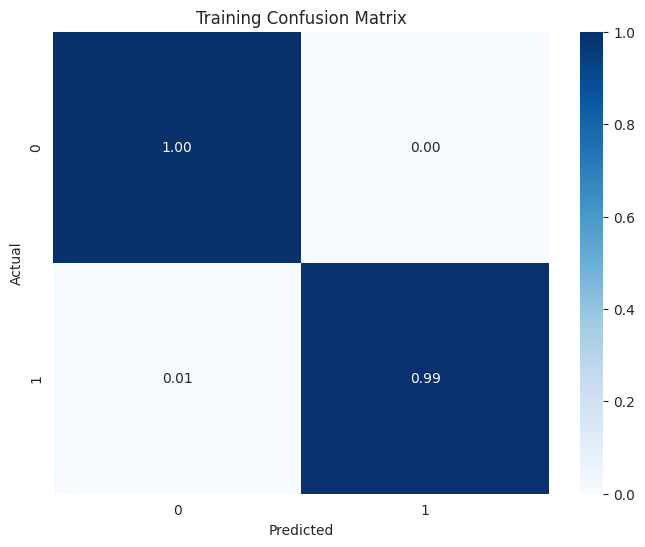

Accuracy for Test: 99.99%


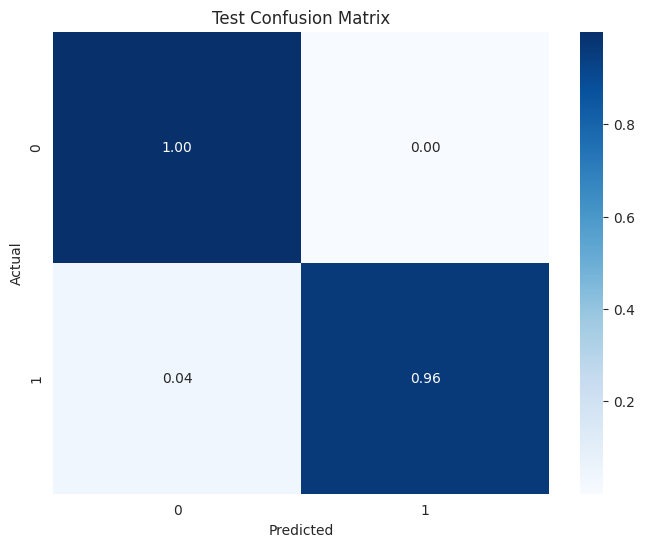

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming train_targets and test_targets are still in 'Yes'/'No' format
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to integers
train_targets = label_encoder.fit_transform(train_targets)
test_targets = label_encoder.transform(test_targets)

# Setting up the XGBClassifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fitting the model
model.fit(train_inputs, train_targets)

# Predictions
train_preds = model.predict(train_inputs)
test_preds = model.predict(test_inputs)

# Evaluation
train_accuracy = accuracy_score(train_targets, train_preds)
test_accuracy = accuracy_score(test_targets, test_preds)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Function to plot confusion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy for {}: {:.2f}%".format(name, accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True, fmt=".2f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    return preds

# Using the defined function to plot for both training and test sets
train_preds = predict_and_plot(train_inputs, train_targets, 'Training')
test_preds = predict_and_plot(test_inputs, test_targets, 'Test')

## regression based

In [ ]:
peak_days_code = {'No': 0.0, 'Yes': 1.0}
train_scaled['peakDayStatus'] = train_scaled.peakDayStatus.map(peak_days_code)
validation_scaled['peakDayStatus'] = validation_scaled.peakDayStatus.map(peak_days_code)
test_scaled['peakDayStatus'] = test_scaled.peakDayStatus.map(peak_days_code)

In [ ]:
train_scaled

,KWH,temp,solarradiation,Hour,day,month,peakDayStatus
1,0.137648,0.425197,0.0,0.043478,0.666667,0.000000,0.0
2,0.134927,0.417323,0.0,0.086957,0.666667,0.000000,0.0
3,0.136590,0.429921,0.0,0.130435,0.666667,0.000000,0.0
4,0.134593,0.436220,0.0,0.173913,0.666667,0.000000,0.0
5,0.135448,0.437795,0.0,0.217391,0.666667,0.000000,0.0
...,...,...,...,...,...,...,...
18387,0.220500,0.409449,0.0,0.130435,0.000000,0.090909,0.0
18388,0.214853,0.411024,0.0,0.173913,0.000000,0.090909,0.0
18389,0.214017,0.395276,0.0,0.217391,0.000000,0.090909,0.0
18390,0.216705,0.368504,0.0,0.260870,0.000000,0.090909,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
train_inputs = train_scaled.drop('KWH', axis=1)
train_targets = train_scaled['KWH']

In [ ]:
test_inputs = test_scaled.drop('KWH', axis=1)
test_targets = test_scaled['KWH']

In [ ]:
# Create and train the model
model = LinearRegression().fit(train_inputs, train_targets)

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
# Generate predictions
predictions = model.predict(train_inputs)

# Compute loss to evalute the model
loss = rmse(train_targets, predictions)
print('Loss:', loss)

Loss: 0.06254693396526188


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Generate predictions
predictions = model.predict(test_inputs)

# Compute MAPE to evaluate the model
mape = mean_absolute_percentage_error(test_targets, predictions)

In [ ]:
mape

20.65918609972921

In [ ]:
from sklearn.metrics import r2_score

# Generate predictions
predictions = model.predict(test_inputs)

# Compute R2 score to evaluate the model
r2 = r2_score(test_targets, predictions)
print('R-squared (R2) score:', r2)

R-squared (R2) score: 0.41047119415577316


## Regression based dynamic model

In [ ]:
# Define the split_data function outside the loop
def split_data(series):
    """Splits input series into train, val, and test."""
    train_len = int(len(series) * 0.75)
    val_len = int(len(series) * 0.05)
    test_len = len(series) - train_len - val_len

    train_data = series[:train_len]
    val_data = series[train_len:train_len + val_len]
    test_data = series[train_len + val_len:]
    return train_data, val_data, test_data

# Now call the split_data function
train_multi, val_multi, test_multi = split_data(s_sc)

# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_multi), columns=train_multi.columns, index=train_multi.index)
validation_scaled = pd.DataFrame(scaler.transform(val_multi), columns=val_multi.columns, index=val_multi.index)
test_scaled = pd.DataFrame(scaler.transform(test_multi), columns=test_multi.columns, index=test_multi.index)


# Process each series
for j in s_sc:
    vars()[f"train_{j}"] = train_scaled[j].values
    vars()[f"train_{j}"].reshape((len(train_scaled[j]), 1))

    vars()[f"val_{j}"] = validation_scaled[j].values
    vars()[f"val_{j}"].reshape((len(validation_scaled[j]), 1))

    vars()[f"test_{j}"] = test_scaled[j].values
    vars()[f"test_{j}"].reshape((len(test_scaled[j]), 1))



out_seq_tr = train_peakDay
dataset = hstack((train_KWH.reshape(-1, 1), train_temp.reshape(-1, 1),train_solarradiation.reshape(-1, 1), out_seq_tr.reshape(-1, 1)))


out_seq_vl = val_peakDay
dataset_val = hstack((val_KWH.reshape(-1, 1),val_temp.reshape(-1, 1),val_solarradiation.reshape(-1, 1), out_seq_vl.reshape(-1, 1)))



out_seqt_test = test_peakDay
dataset_test = hstack((test_KWH.reshape(-1, 1),test_temp.reshape(-1, 1),test_solarradiation.reshape(-1, 1), out_seqt_test.reshape(-1, 1)))



n_steps_in, n_steps_out = 24, 24
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
X1, y1 = split_sequences(dataset_val, n_steps_in, n_steps_out)
X2, y2 = split_sequences(dataset_test, n_steps_in, n_steps_out)
n_features = X.shape[2]

# Reshape input data to have 3D shape
X = X.reshape((X.shape[0], n_steps_in, n_features))
X1 = X1.reshape((X1.shape[0], n_steps_in, n_features))
X2 = X2.reshape((X2.shape[0], n_steps_in, n_features))


In [ ]:
print(X.shape)
print(X1.shape)
print(X2.shape)
print(y.shape)
print(y1.shape)
print(y2.shape)

(19552, 24, 3)
(1259, 24, 3)
(5180, 24, 3)
(19552, 24)
(1259, 24)
(5180, 24)


In [ ]:
print(y2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
def train_rnn_model(X, y, epochs=100, batch_size=32, learning_rate=0.001, early_stopping_patience=10, activations=['tanh', 'sigmoid']):
    # Create a Sequential model
    model_rnn = Sequential()
    # Adjust the input shape and return sequences as per the RNN architecture and data
    model_rnn.add(SimpleRNN(100, activation=activations[0], return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
    # Adjust the number of units and activation for the output layer for binary classification
    model_rnn.add(Dense(24, activation='sigmoid'))  # For binary classification

    # Set the loss function for classification and compile the model
    loss = 'binary_crossentropy'  # Use binary_crossentropy for binary classification
    optimizer = Adam(learning_rate=learning_rate)
    model_rnn.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])  # Use accuracy as a metric for classification

    # Display the model summary
    model_rnn.summary()

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience)

    # Train the model
    history = model_rnn.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X1, y1), callbacks=[early_stopping])

    # Return only the trained model
    return model_rnn


In [ ]:
# Assume X_train, y_train, X_val, y_val are already prepared from your dataset
trained_model = train_rnn_model(X, y, epochs=100, batch_size=32, learning_rate=0.001, early_stopping_patience=20, activations=['tanh', 'sigmoid'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100)               10400     
                                                                 
 dense_2 (Dense)             (None, 24)                2424      
                                                                 
Total params: 12824 (50.09 KB)
Trainable params: 12824 (50.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
611/611 [==============================] - 7s 10ms/step - loss: nan - accuracy: 0.8910 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/100
611/611 [==============================] - 5s 9ms/step - loss: nan - accuracy: 0.8984 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/100
611/611 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.8984 - val_loss: nan - val_accuracy: 1.0000
Ep

I can conclude that the model is not overfitted and it predict normally, we just need to improve it.

In [ ]:
import numpy as np

def classification_metrics(y_true, y_pred, threshold):
    # Binarize the true and predicted values based on the threshold
    y_true_binary = (y_true >= threshold).astype(int)
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Calculating True Positives, False Positives, False Negatives, True Negatives
    TP = np.sum((y_true_binary == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true_binary == 0) & (y_pred_binary == 1))
    FN = np.sum((y_true_binary == 1) & (y_pred_binary == 0))
    TN = np.sum((y_true_binary == 0) & (y_pred_binary == 0))

    # Calculate metrics to avoid division by zero where necessary
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # True Positive Rate (Recall)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    Recall = TPR  # Recall is the same as True Positive Rate
    F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0  # F1 Score

    # Return all the metrics as a dictionary
    return {
        "True Positive Rate (Recall)": TPR,
        "False Positive Rate": FPR,
        "Precision": Precision,
        "Recall": Recall,
        "F1 Score": F1,
        "True Positives": TP,
        "False Positives": FP,
        "False Negatives": FN,
        "True Negatives": TN
    }

In [ ]:
# Define the threshold for classification
threshold = 0.5  # This is common for binary classification tasks
y_pred = trained_model.predict(X2)
# Convert probabilities to binary predictions based on the threshold
y_pred_binary = (y_pred >= threshold).astype(int)

# Evaluate the model using the custom metrics function
metrics = classification_metrics(y2, y_pred_binary, threshold)

162/162 [==============================] - 3s 11ms/step


In [ ]:
metrics

{'True Positive Rate (Recall)': 0.0,
 'False Positive Rate': 0.0,
 'Precision': 0,
 'Recall': 0.0,
 'F1 Score': 0,
 'True Positives': 0,
 'False Positives': 0,
 'False Negatives': 13920,
 'True Negatives': 110400}

## Now lest do it as classic regression case